In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("new.xlsx")

In [9]:
df

id address_state application_type  emp_length  \
0      1077430            GA       INDIVIDUAL           0   
1      1072053            CA       INDIVIDUAL           9   
2      1069243            CA       INDIVIDUAL           4   
3      1041756            TX       INDIVIDUAL           0   
4      1068350            IL       INDIVIDUAL          10   
...        ...           ...              ...         ...   
38571   803452            NJ       INDIVIDUAL           0   
38572   970377            NY       INDIVIDUAL           8   
38573   875376            CA       INDIVIDUAL           5   
38574   972997            NY       INDIVIDUAL           5   
38575   682952            NY       INDIVIDUAL           4   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat Technology Inc     C           RENT 2021-01-05   
3                  barnes distribution     B       MORTGAGE 2021-02-25   
4                        J&J Steel Inc     A       MORTGAGE 2021-01-01   
...                                ...   ...            ...        ...   
38571         Joseph M Sanzari Company     C       MORTGAGE 2021-07-11   
38572                        Swat Fame     C           RENT 2021-10-11   
38573  Anaheim Regional Medical Center     D           RENT 2021-09-11   
38574               Brooklyn Radiology     D           RENT 2021-10-11   
38575                    Allen Edmonds     F           RENT 2021-07-11   

      last_credit_pull_date last_payment_date  ... verification_status  \
0                2021-09-13        2021-04-13  ...     Source Verified   
1                2021-12-14        2021-01-15  ...     Source Verified   
2                2021-12-12        2021-01-09  ...        Not Verified   
3                2021-12-12        2021-03-12  ...     Source Verified   
4                2021-12-14        2021-01-15  ...            Verified   
...                     ...               ...  ...                 ...   
38571            2021-05-16        2021-05-16  ...            Verified   
38572            2021-04-16        2021-05-16  ...            Verified   
38573            2021-05-16        2021-05-16  ...            Verified   
38574            2021-05-16        2021-05-16  ...            Verified   
38575            2021-05-16        2021-05-16  ...            Verified   

      annual_income     dti installment int_rate  loan_amount total_acc  \
0           30000.0  0.0100       59.83   0.1527         2500         4   
1           48000.0  0.0535      109.43   0.1864         3000         4   
2           50000.0  0.2088      421.65   0.1596        12000        11   
3           42000.0  0.0540       97.06   0.1065         4500         9   
4           83000.0  0.0231      106.53   0.0603         3500        28   
...             ...     ...         ...      ...          ...       ...   
38571      100000.0  0.1986      551.64   0.1299        24250        33   
38572       50000.0  0.0458      579.72   0.1349        25200        18   
38573       65000.0  0.1734      627.93   0.1749        25000        20   
38574      368000.0  0.0009      612.72   0.1825        24000         9   
38575       80000.0  0.0600      486.86   0.2099        18000         7   

       total_payment  month  month_name  
0               1009      2    February  
1               3939      1     January  
2               3522      1     January  
3               4911      2    February  
4               3835      1     January  
...              ...    ...         ...  
38571          31946      7        July  
38572          31870     10     October  
38573          35721      9   September  
38574          33677     10     October  
38575          27679      7        July  

[38576 rows x 26 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  int64         
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [5]:
df['month'] = pd.DatetimeIndex(df['issue_date']).month

In [7]:
df['month_name'] = pd.DatetimeIndex(df['issue_date']).month_name()

In [97]:
df.duplicated().sum()

0

# 1. TOTAL LOAN APPLICATION

In [91]:
total_loan_applications = df['id'].count()
print("Total Loan Appliactions issued : ",total_loan_applications)

Total Loan Appliactions issued :  38576


**MTD (Month-to-Date) Loan Applications**

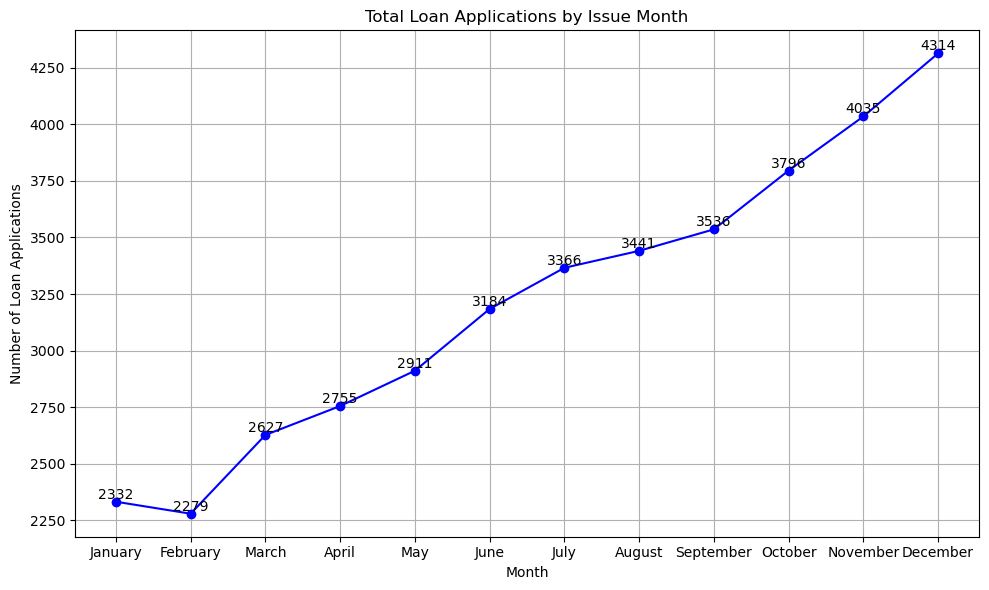

In [13]:
# Assuming 'loan_id' is the unique identifier for loans
monthly_loan_apps = df.groupby(df['issue_date'].dt.to_period('M'))['id'].count()
# Sort the index by calendar month order (optional step for better ordering)
monthly_loan_apps.index = monthly_loan_apps.index.strftime('%B')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_loan_apps.index, monthly_loan_apps.values, marker='o', color='b')

# Annotate each point with the total number of loan applications
for i, value in enumerate(monthly_loan_apps):
    plt.text(monthly_loan_apps.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Total Loan Applications by Issue Month')
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Loan applications issued in 2021-01:
issue_date
1        2
5        1
8      171
9      239
10     583
11    1336
Name: id, dtype: int64


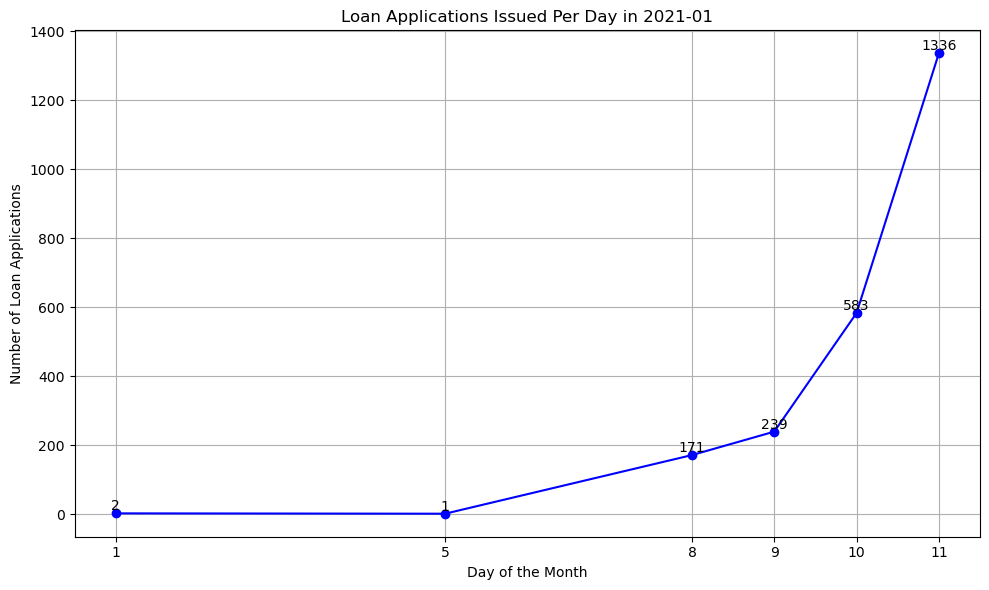

Loan applications issued in 2021-02:
issue_date
2        1
8      174
9      261
10     602
11    1240
25       1
Name: id, dtype: int64


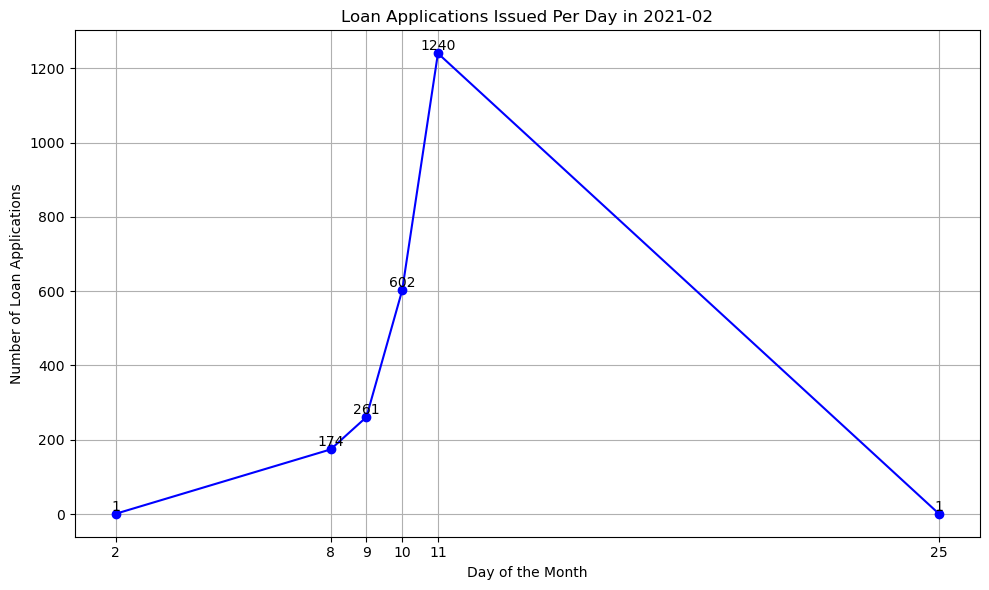

Loan applications issued in 2021-03:
issue_date
8      236
9      276
10     717
11    1398
Name: id, dtype: int64


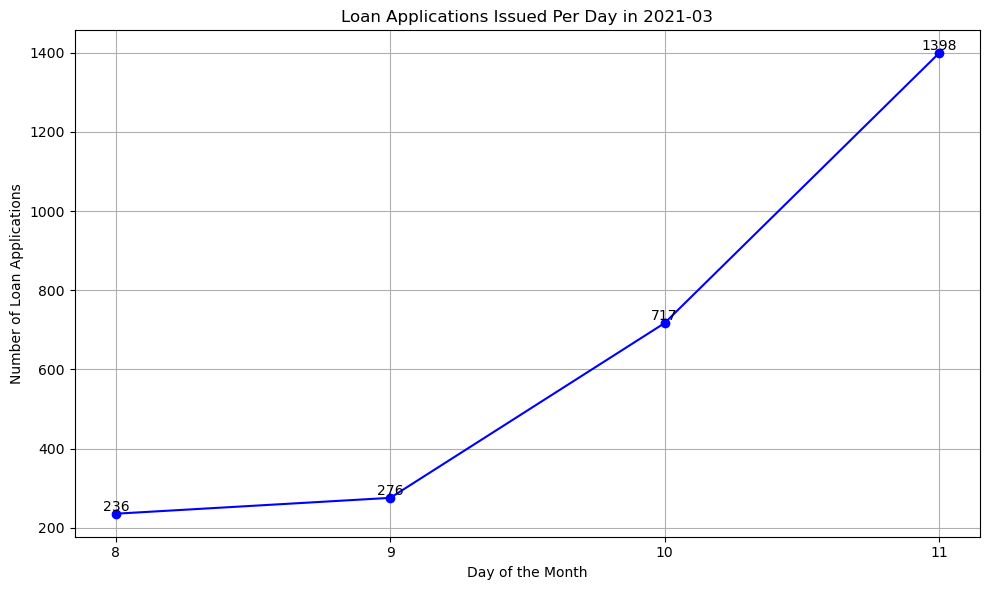

Loan applications issued in 2021-04:
issue_date
8      155
9      289
10     805
11    1506
Name: id, dtype: int64


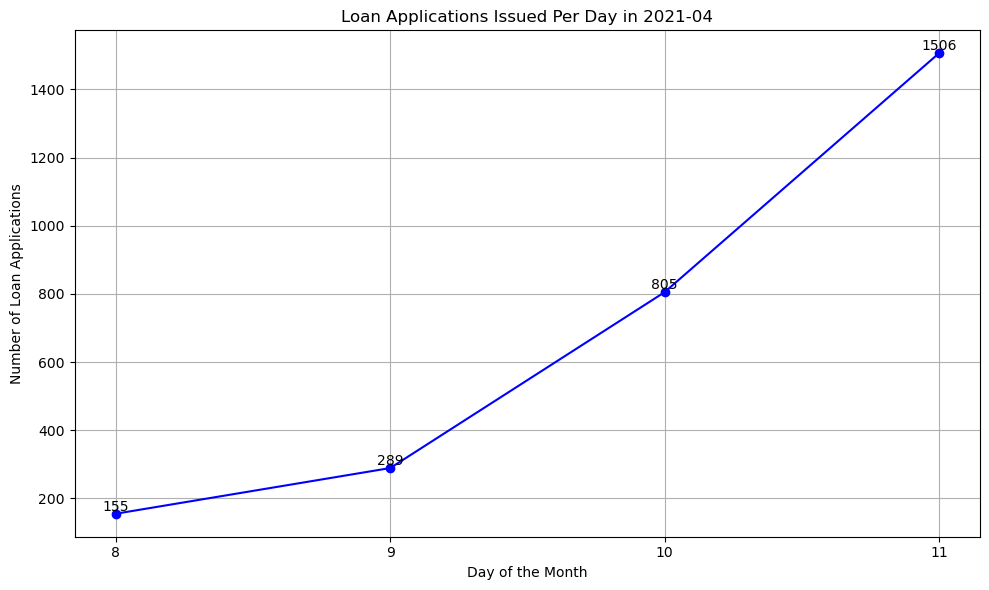

Loan applications issued in 2021-05:
issue_date
8       71
9      319
10     892
11    1629
Name: id, dtype: int64


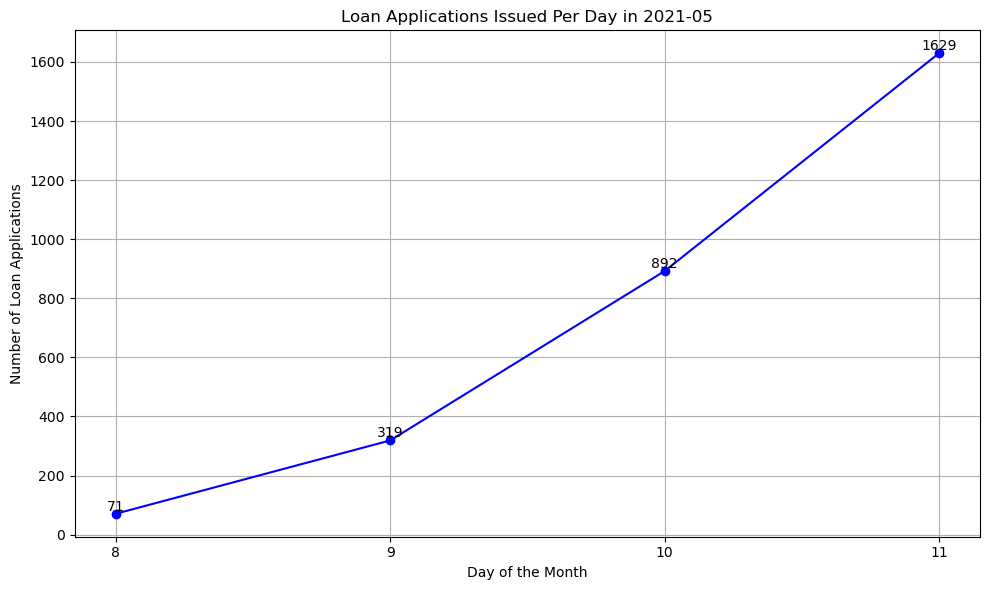

Loan applications issued in 2021-06:
issue_date
7        1
8       66
9      354
10     995
11    1768
Name: id, dtype: int64


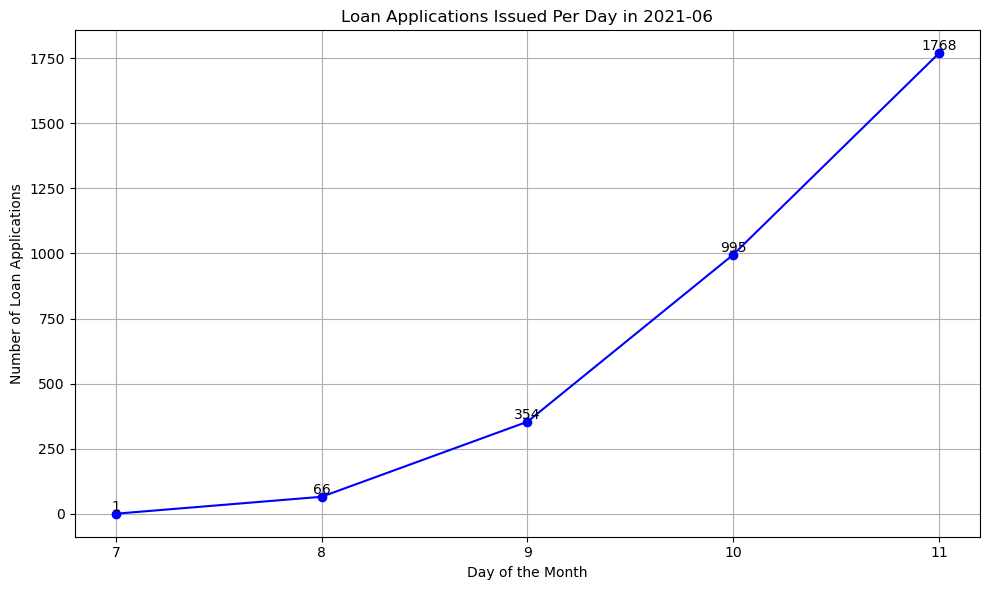

Loan applications issued in 2021-07:
issue_date
7       30
8       83
9      373
10    1091
11    1787
17       1
22       1
Name: id, dtype: int64


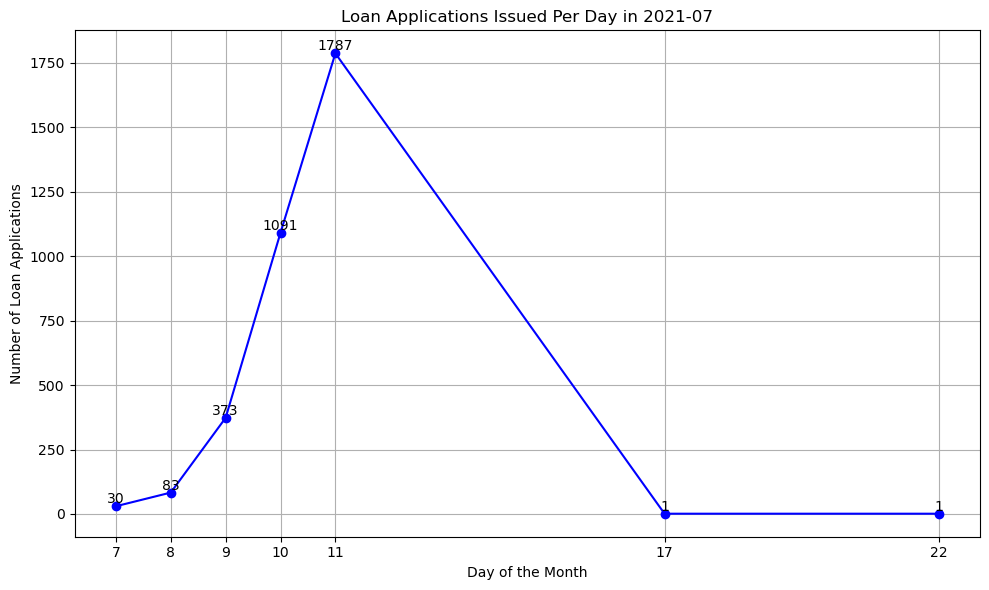

Loan applications issued in 2021-08:
issue_date
7       33
8       71
9      408
10    1056
11    1873
Name: id, dtype: int64


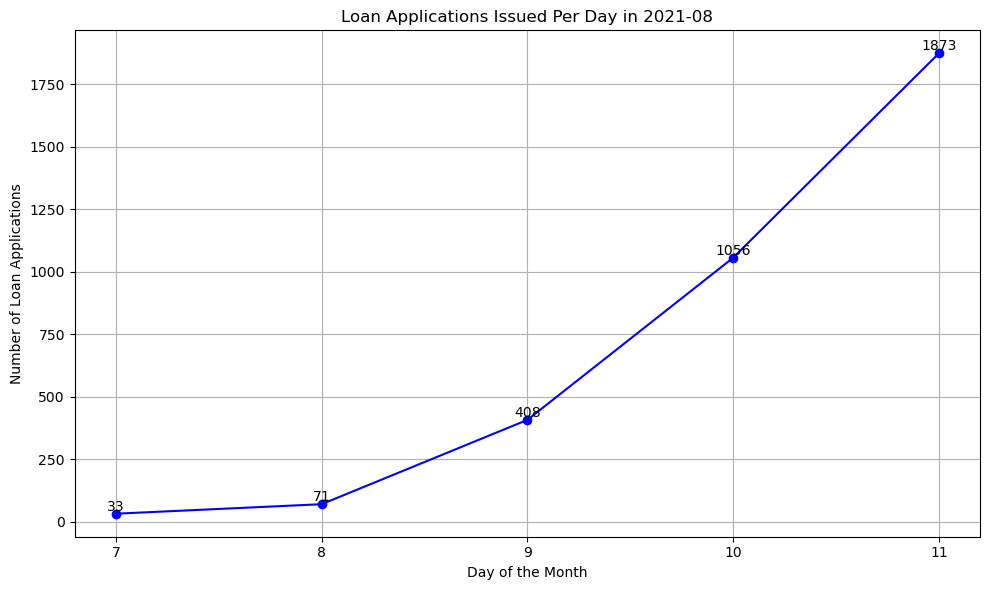

Loan applications issued in 2021-09:
issue_date
2        1
7       18
8       32
9      447
10    1058
11    1980
Name: id, dtype: int64


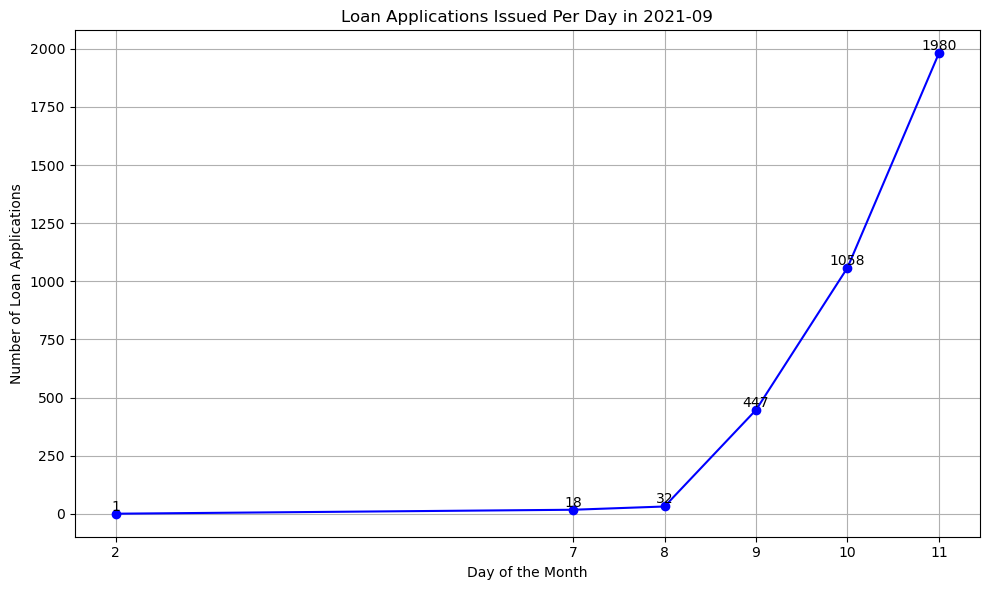

Loan applications issued in 2021-10:
issue_date
7       47
8       96
9      545
10    1083
11    2025
Name: id, dtype: int64


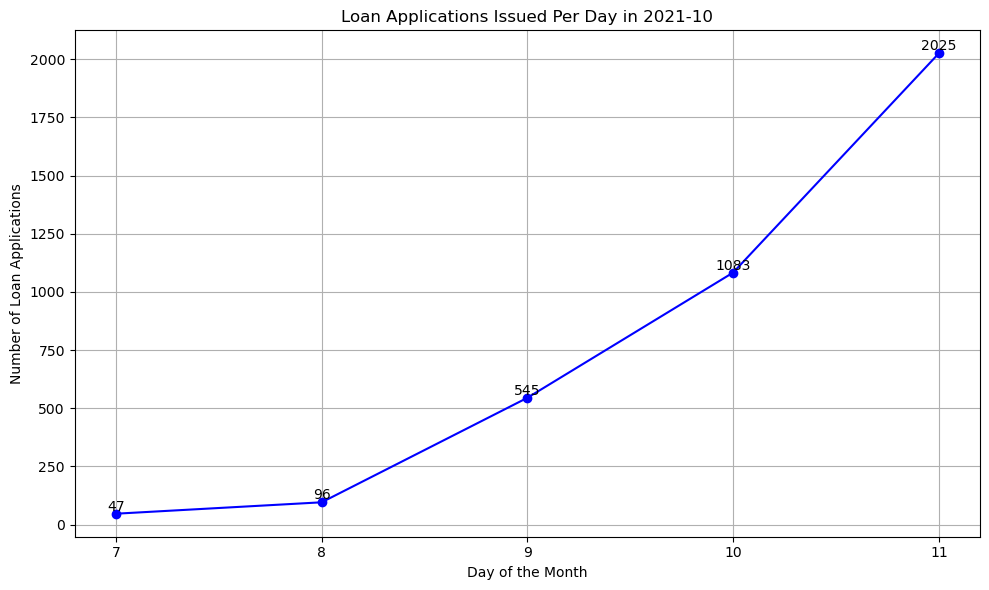

Loan applications issued in 2021-11:
issue_date
7       37
8      184
9      598
10    1095
11    2120
19       1
Name: id, dtype: int64


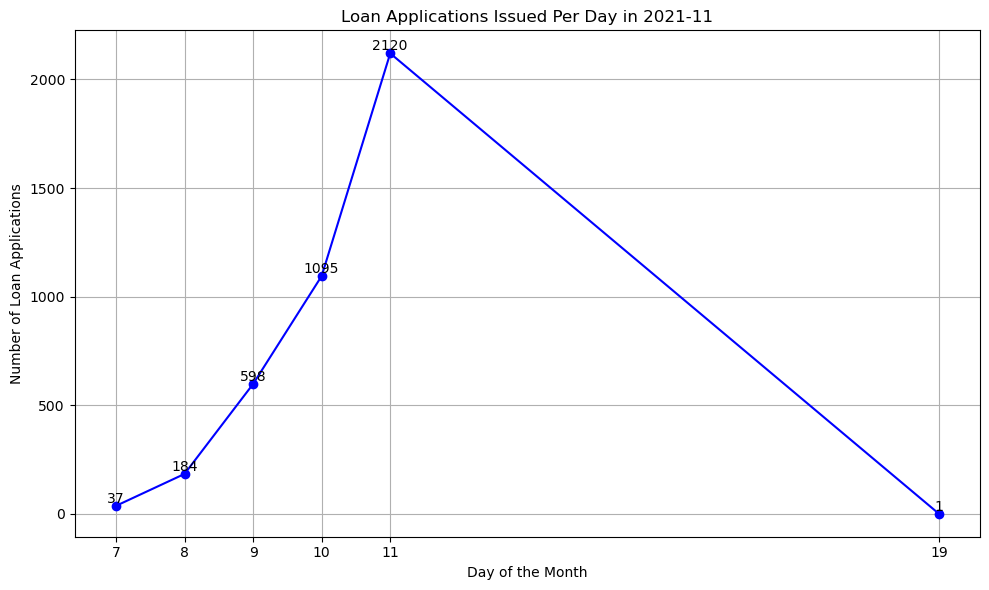

Loan applications issued in 2021-12:
issue_date
2        1
7       85
8      222
9      597
10    1220
11    2188
12       1
Name: id, dtype: int64


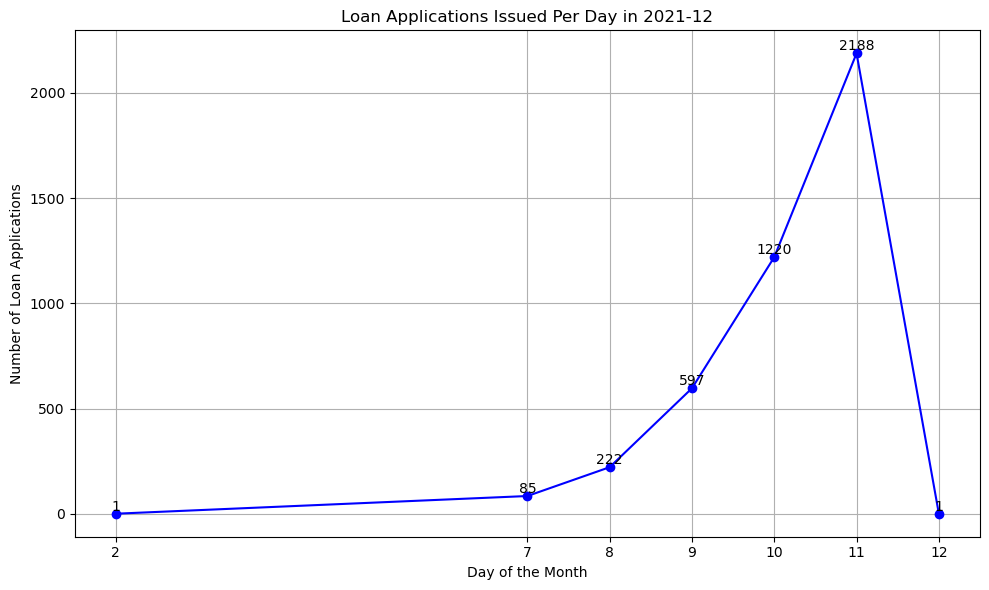

In [15]:
for i in range(1,13):
    # Specify the particular month and year (for example, September 2023)
    month = i   # September
    year = 2021 

    # Filter the DataFrame for the specified month and year
    df_filtered = df[(df['issue_date'].dt.month == month) & (df['issue_date'].dt.year == year)]

    # Group by day and count loan applications issued on each day
    daily_loan_apps = df_filtered.groupby(df_filtered['issue_date'].dt.day)['id'].count()

    # Output the result
    print(f"Loan applications issued in {year}-{month:02d}:")
    print(daily_loan_apps)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_loan_apps.index, daily_loan_apps.values, marker='o', linestyle='-', color='b')

    # Annotate each point with the total number of loan applications
    for i, value in enumerate(daily_loan_apps):
        plt.text(daily_loan_apps.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Add titles and labels
    plt.title(f'Loan Applications Issued Per Day in {year}-{month:02d}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Number of Loan Applications')
    plt.grid(True)
    plt.xticks(daily_loan_apps.index)  # Show the day on the x-axis
    plt.tight_layout()

    # Show the plot
    plt.show()

**MONTH - OVER - MONTH (MOM) CHANGES IS LOAN APPLICATION**


Month-over-Month Changes (%):
issue_date
February     -2.272727
March        15.269855
April         4.872478
May           5.662432
June          9.378221
July          5.716080
August        2.228164
September     2.760825
October       7.352941
November      6.296101
December      6.914498
Name: id, dtype: float64


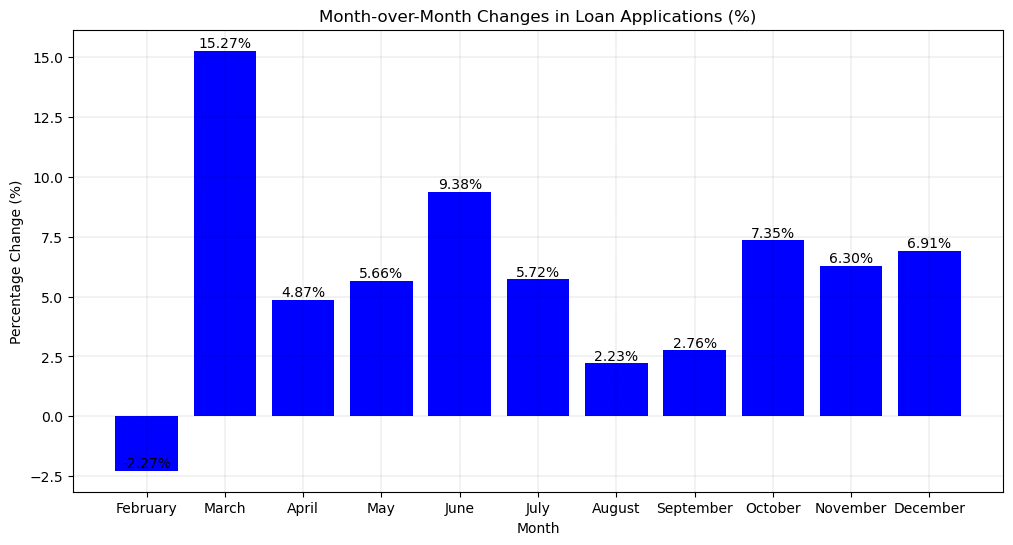

In [21]:
# Group by year and month, and count loan applications
monthly_loan_apps = df.groupby(df['issue_date'].dt.to_period('M'))['id'].count()

# Calculate month-over-month changes
mtd_changes = monthly_loan_apps.pct_change() * 100  # Change to percentage

# Convert period index to string month names
mtd_changes.index = mtd_changes.index.strftime('%B')
mtd_changes = mtd_changes.dropna()

# Output the results
print("\nMonth-over-Month Changes (%):")
print(mtd_changes)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(mtd_changes.index, mtd_changes.values, color='blue')
plt.title('Month-over-Month Changes in Loan Applications (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

# 2. TOTAL FUNDED AMOUNT

In [23]:
# Calculate the total funded amount
total_funded_amount = df['loan_amount'].sum()

# Print the total funded amount
print("Total Funded Amount: Rs ", total_funded_amount)

Total Funded Amount: Rs  435757075


**MTD (MONTH-TO-DATE) TOTAL FUNDED AMOUNT**

Total Funded Amount per Month:
issue_date
January      25031650
February     24647825
March        28875700
April        29800800
May          31738350
June         34161475
July         35813900
August       38149600
September    40907725
October      44893800
November     47754825
December     53981425
Name: loan_amount, dtype: int64
435757075


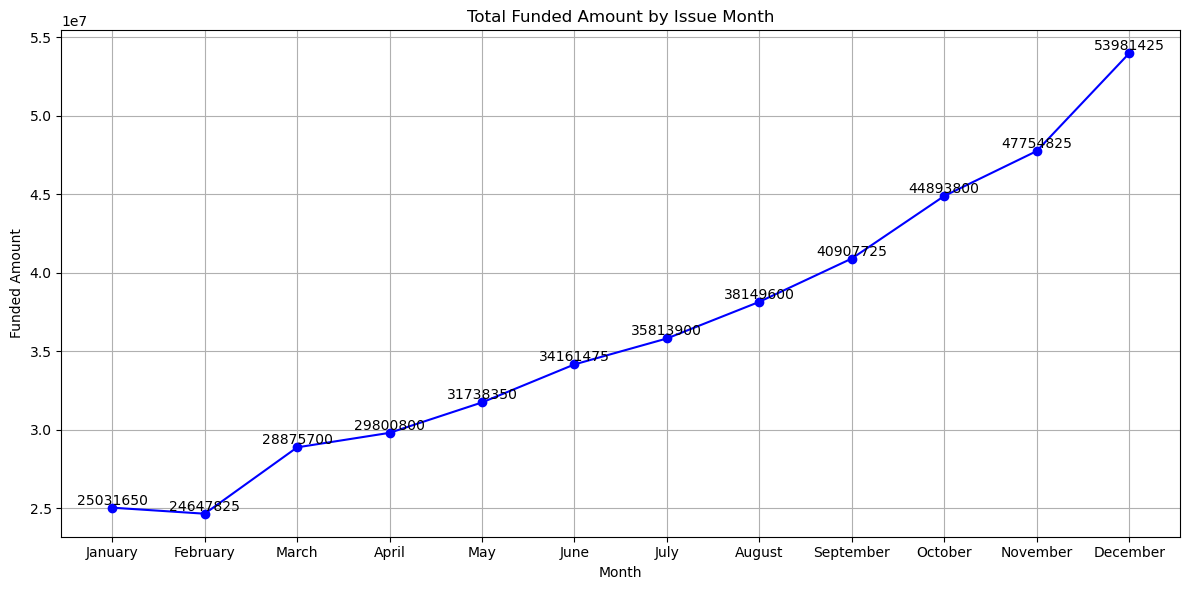

In [25]:
monthly_funded_amount = df.groupby(df['issue_date'].dt.to_period('M'))['loan_amount'].sum()
# Sort the index by calendar month order (optional step for better ordering)
monthly_funded_amount.index = monthly_funded_amount.index.strftime('%B')

# Print the monthly funded amounts
print("Total Funded Amount per Month:")
print(monthly_funded_amount)
print(monthly_funded_amount.sum())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_funded_amount.index, monthly_funded_amount.values, marker='o', color='b')

# Annotate each point with the total number of loan applications
for i, value in enumerate(monthly_funded_amount):
    plt.text(monthly_funded_amount.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Total Funded Amount by Issue Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

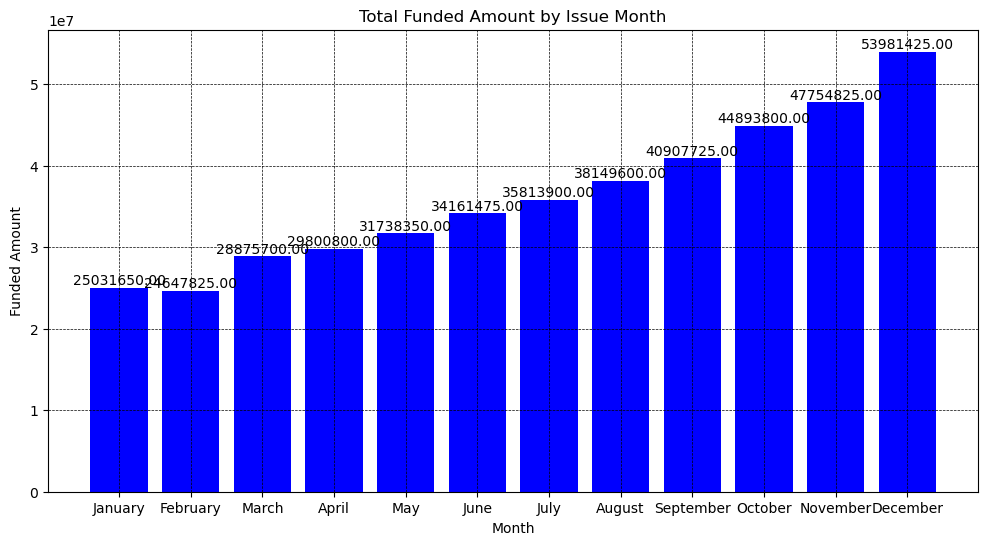

In [27]:
# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_funded_amount.index, monthly_funded_amount.values, color='blue')
plt.title('Total Funded Amount by Issue Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

Loan amount funded in 2021-01:
issue_date
1         6500
5        12000
8      1761050
9      2186225
10     6540475
11    14525400
Name: loan_amount, dtype: int64


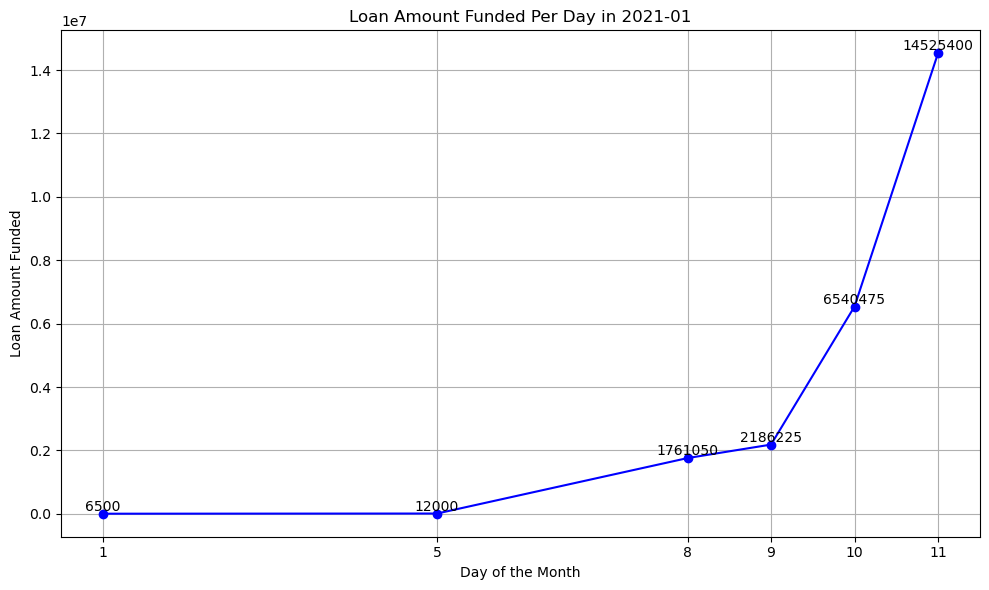

Loan amount funded in 2021-02:
issue_date
2         5000
8      1679375
9      2345200
10     6573875
11    14039875
25        4500
Name: loan_amount, dtype: int64


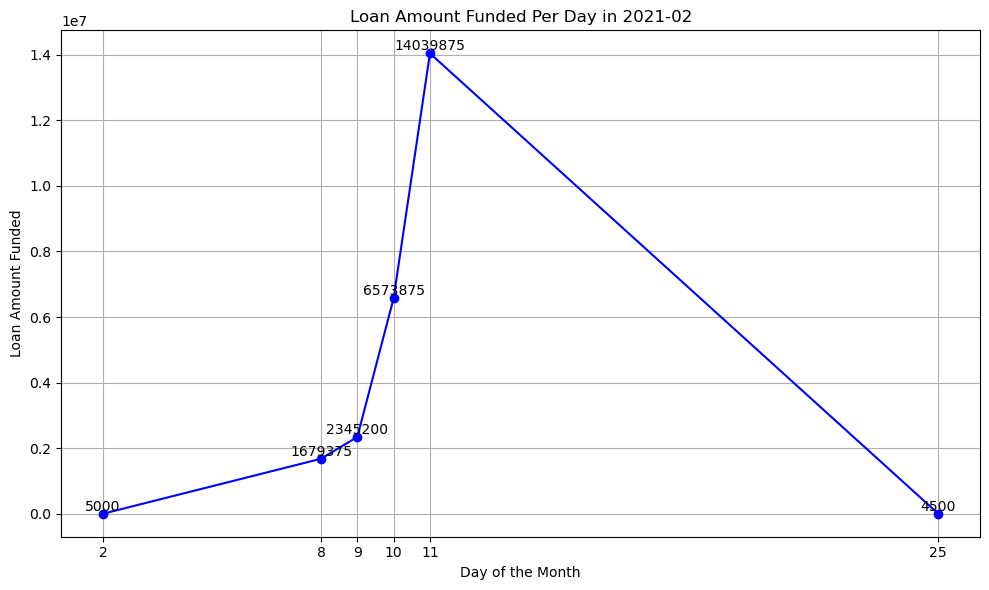

Loan amount funded in 2021-03:
issue_date
8      2693925
9      2653250
10     7461675
11    16066850
Name: loan_amount, dtype: int64


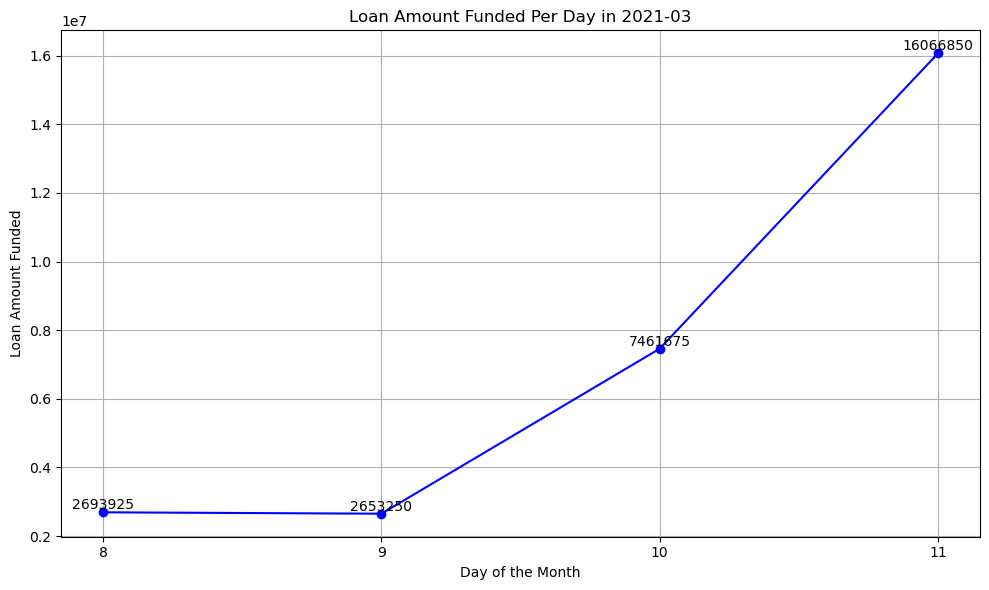

Loan amount funded in 2021-04:
issue_date
8      1556300
9      2653150
10     8467450
11    17123900
Name: loan_amount, dtype: int64


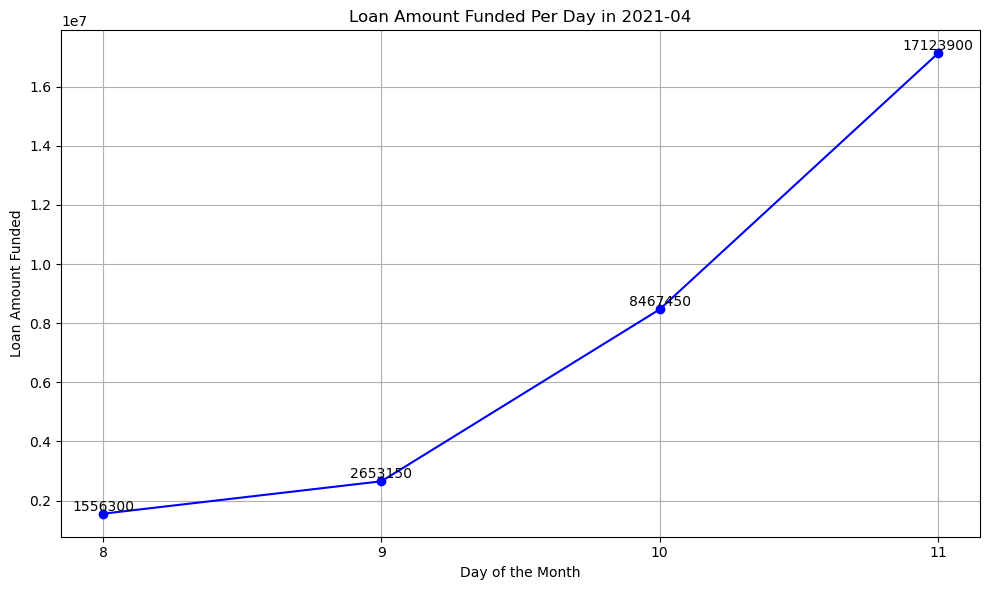

Loan amount funded in 2021-05:
issue_date
8       418900
9      3115150
10     9705900
11    18498400
Name: loan_amount, dtype: int64


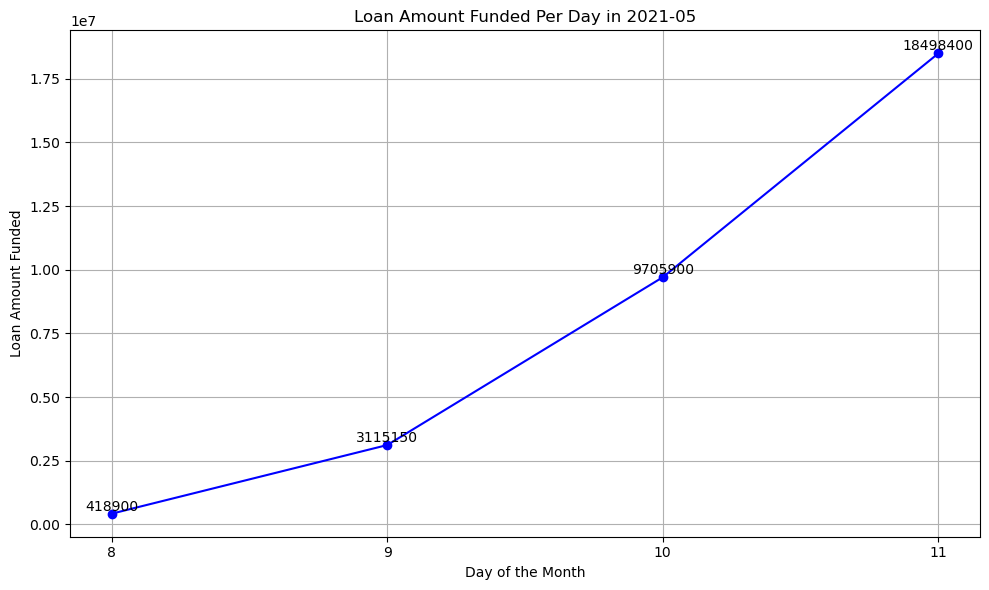

Loan amount funded in 2021-06:
issue_date
7         7500
8       379975
9      3182550
10    10220750
11    20370700
Name: loan_amount, dtype: int64


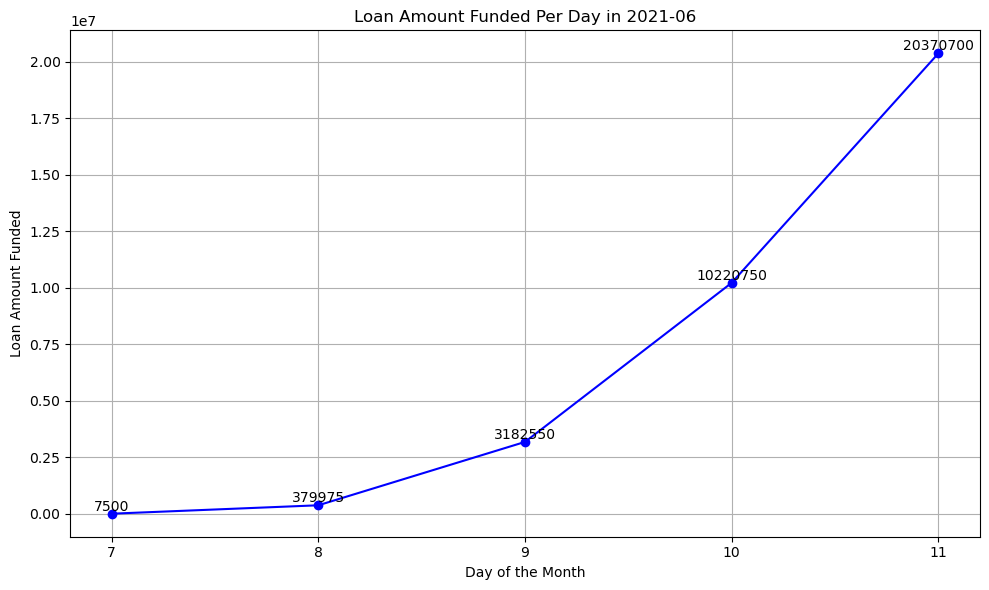

Loan amount funded in 2021-07:
issue_date
7       171700
8       524925
9      3466450
10    11021325
11    20616100
17        8000
22        5400
Name: loan_amount, dtype: int64


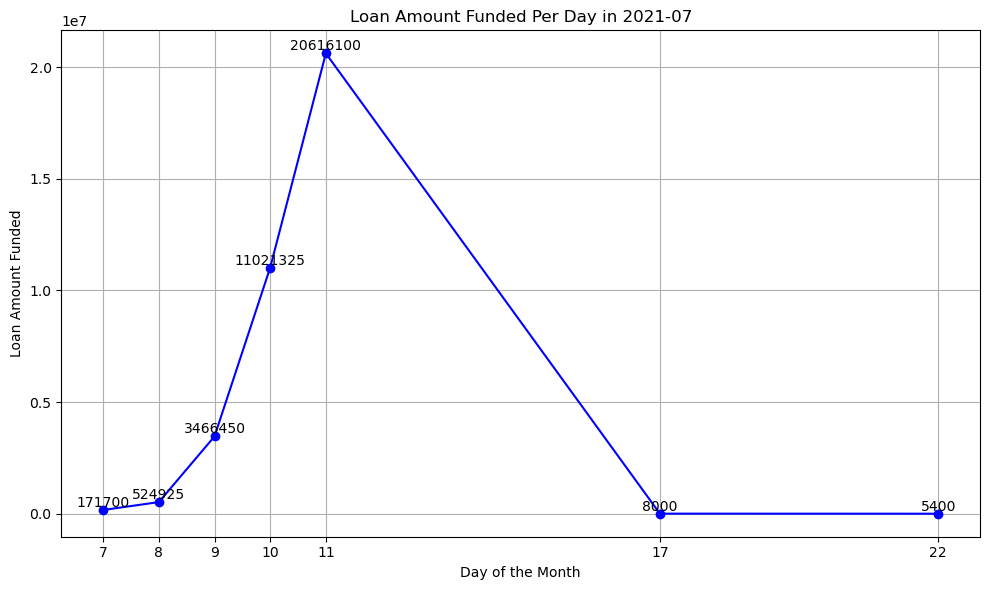

Loan amount funded in 2021-08:
issue_date
7       208475
8       412200
9      3933700
10    11029075
11    22566150
Name: loan_amount, dtype: int64


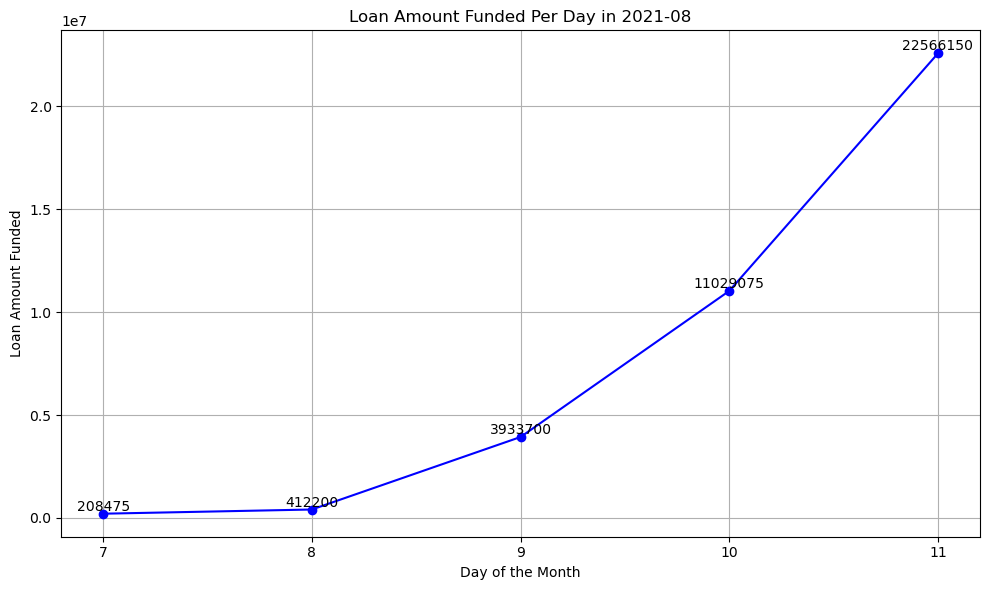

Loan amount funded in 2021-09:
issue_date
2        24000
7       146025
8       184925
9      4540125
10    11062925
11    24949725
Name: loan_amount, dtype: int64


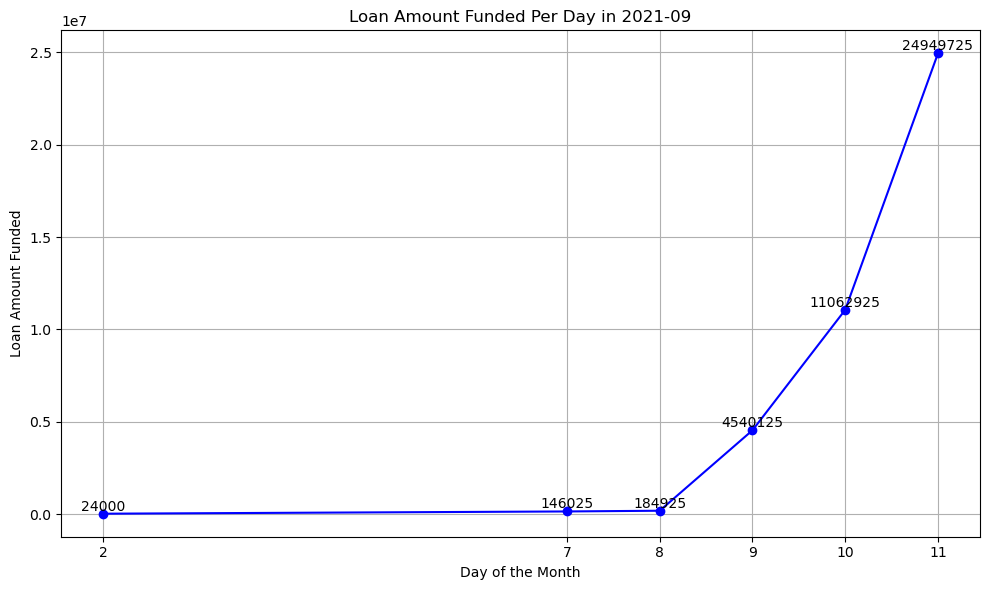

Loan amount funded in 2021-10:
issue_date
7       318775
8       780750
9      5617900
10    11805200
11    26371175
Name: loan_amount, dtype: int64


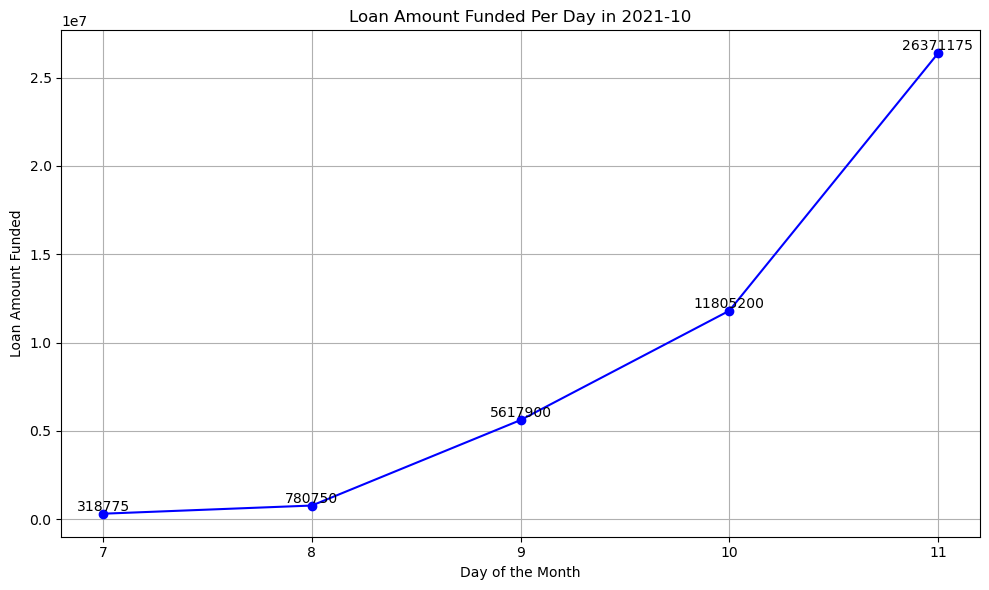

Loan amount funded in 2021-11:
issue_date
7       380625
8      1703450
9      6116225
10    12334450
11    27214075
19        6000
Name: loan_amount, dtype: int64


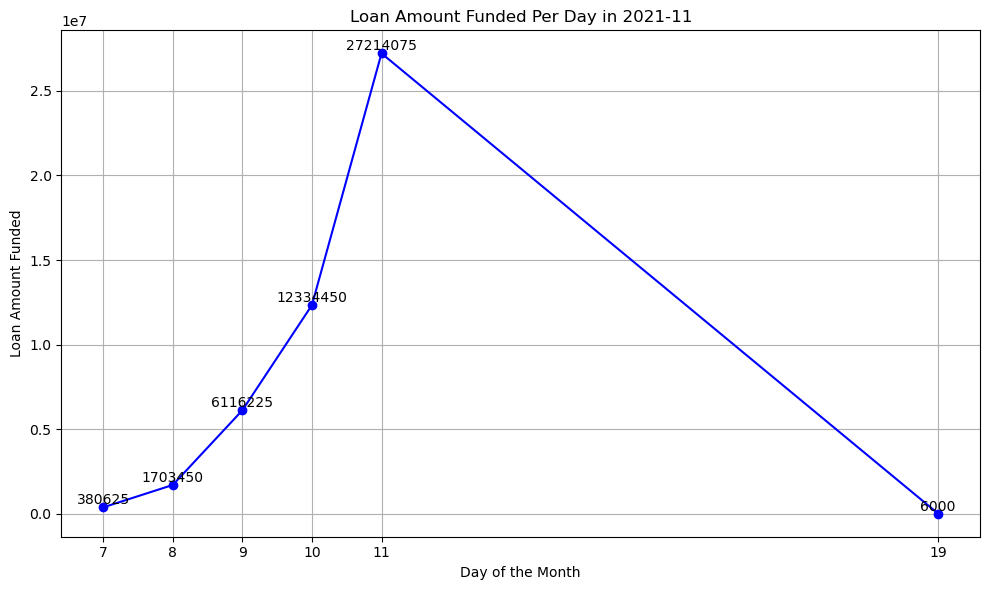

Loan amount funded in 2021-12:
issue_date
2         3050
7       986175
8      2289500
9      6485825
10    13345500
11    30866375
12        5000
Name: loan_amount, dtype: int64


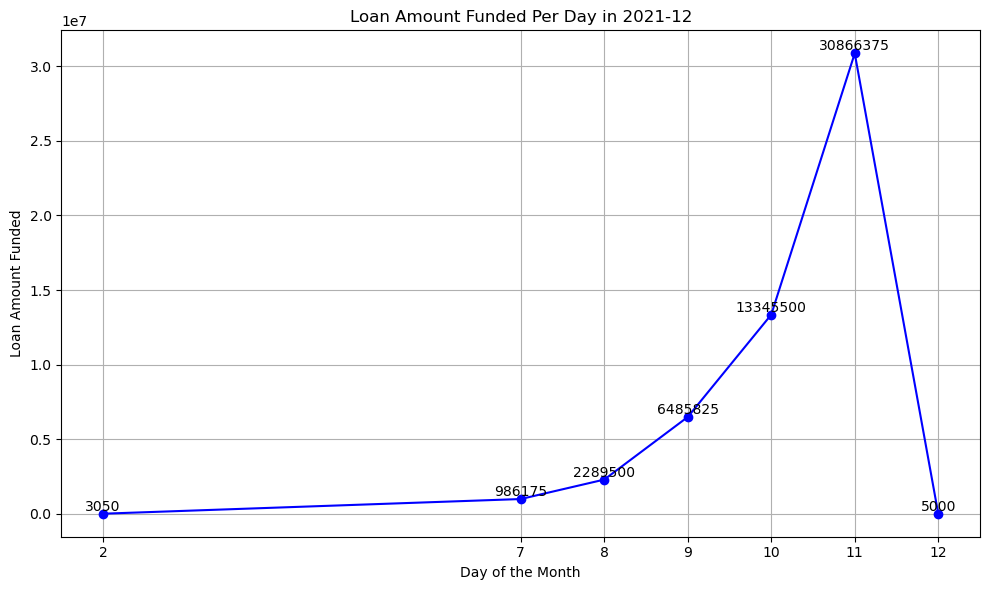

In [31]:
for i in range(1,13):
    # Specify the particular month and year (for example, September 2023)
    month = i   # September
    year = 2021 

    # Filter the DataFrame for the specified month and year
    df_filtered = df[(df['issue_date'].dt.month == month) & (df['issue_date'].dt.year == year)]

    # Group by day and count loan applications issued on each day
    daily_loan_funded_amount = df_filtered.groupby(df_filtered['issue_date'].dt.day)['loan_amount'].sum()

    # Output the result
    print(f"Loan amount funded in {year}-{month:02d}:")
    print(daily_loan_funded_amount)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_loan_funded_amount.index, daily_loan_funded_amount.values, marker='o', linestyle='-', color='b')

    # Annotate each point with the total number of loan applications
    for i, value in enumerate(daily_loan_funded_amount):
        plt.text(daily_loan_funded_amount.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Add titles and labels
    plt.title(f'Loan Amount Funded Per Day in {year}-{month:02d}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Loan Amount Funded')
    plt.grid(True)
    plt.xticks(daily_loan_funded_amount.index)  # Show the day on the x-axis
    plt.tight_layout()

    # Show the plot
    plt.show()

**MONTH-OVER-MONTH (MOM) CHANGES IN  FUNDED AMOUNT**


Month-over-Month Changes (%):
issue_date
February     -1.533359
March        17.153136
April         3.203732
May           6.501671
June          7.634691
July          4.837101
August        6.521769
September     7.229761
October       9.744064
November      6.372873
December     13.038682
Name: loan_amount, dtype: float64


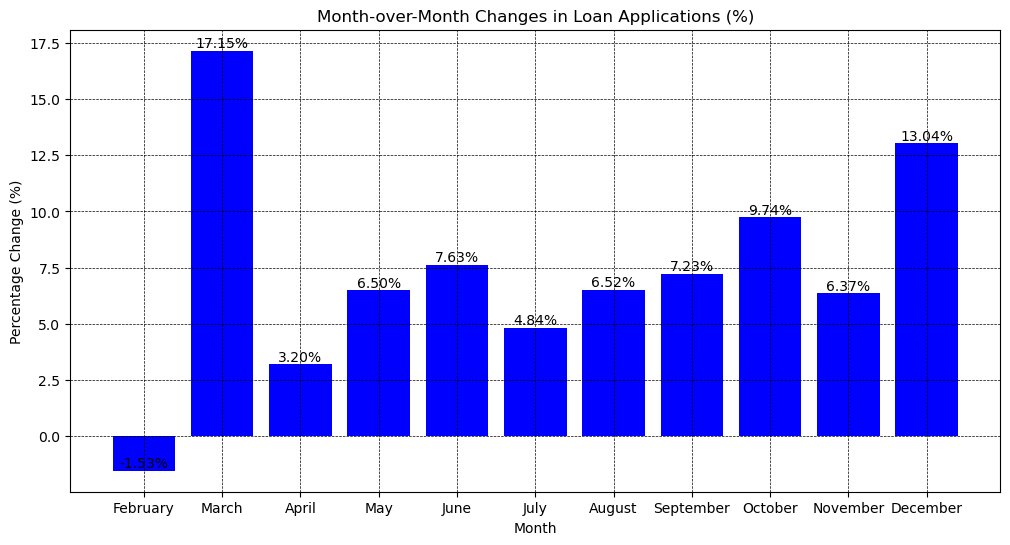

In [33]:
# Group by year and month, and count loan applications
monthly_funded_amount = df.groupby(df['issue_date'].dt.to_period('M'))['loan_amount'].sum()

# Calculate month-over-month changes
mfd_changes = monthly_funded_amount.pct_change() * 100  # Change to percentage

# Convert period index to string month names
mfd_changes.index = mfd_changes.index.strftime('%B')
mfd_changes = mfd_changes.dropna()

# Output the results
print("\nMonth-over-Month Changes (%):")
print(mfd_changes)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(mfd_changes.index, mfd_changes.values, color='blue')
plt.title('Month-over-Month Changes in Loan Applications (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

# 3. TOTAL AMOUNT RECEIVED

In [42]:
# Calculating the total amount received
total_amount_received = df['total_payment'].sum()

# Displaying the total amount received
print(f"Total Amount Received: Rs {total_amount_received}")

Total Amount Received: Rs 473070933


**MTD (Month-to-Date) Total Amount Recieved**

Total Amount Recieved per Month:
issue_date
January      27578836
February     27717745
March        32264400
April        32495533
May          33750523
June         36164533
July         38827220
August       42682218
September    43983948
October      49399567
November     50132030
December     58074380
Name: total_payment, dtype: int64
473070933


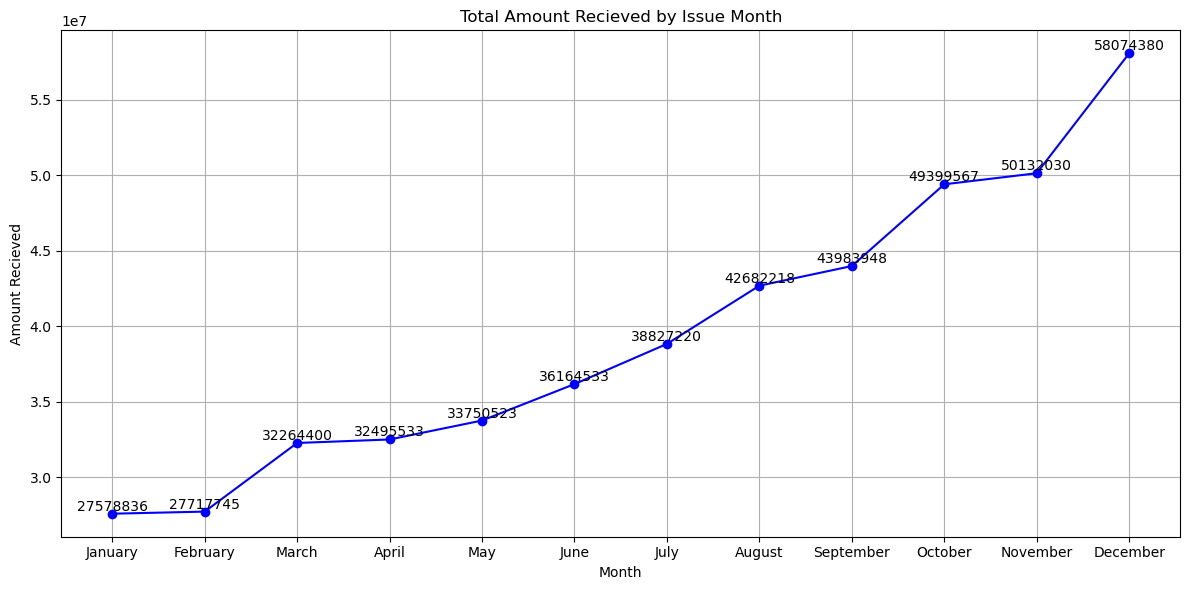

In [45]:
monthly_recieved_amount = df.groupby(df['issue_date'].dt.to_period('M'))['total_payment'].sum()
# Sort the index by calendar month order (optional step for better ordering)
monthly_recieved_amount.index = monthly_recieved_amount.index.strftime('%B')

# Print the monthly funded amounts
print("Total Amount Recieved per Month:")
print(monthly_recieved_amount)
print(monthly_recieved_amount.sum())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_recieved_amount.index, monthly_recieved_amount.values, marker='o', color='b')

# Annotate each point with the total number of loan applications
for i, value in enumerate(monthly_recieved_amount):
    plt.text(monthly_recieved_amount.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Total Amount Recieved by Issue Month')
plt.xlabel('Month')
plt.ylabel('Amount Recieved')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Loan amount recieved in 2021-01:
issue_date
1         7774
5         3522
8      1794520
9      2387251
10     7143595
11    16242174
Name: total_payment, dtype: int64


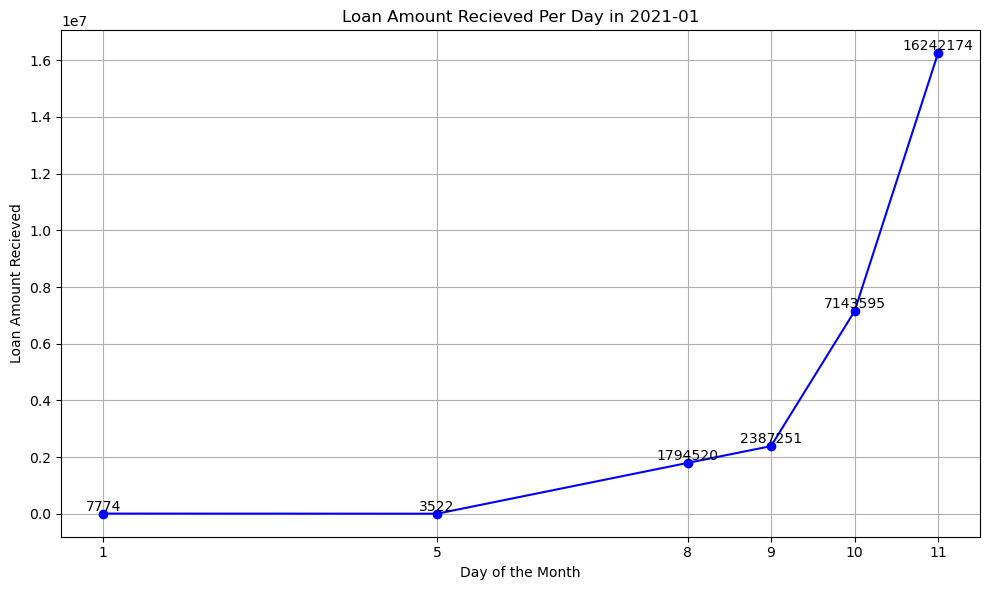

Loan amount recieved in 2021-02:
issue_date
2         6361
8      1796273
9      2560558
10     7355108
11    15994534
25        4911
Name: total_payment, dtype: int64


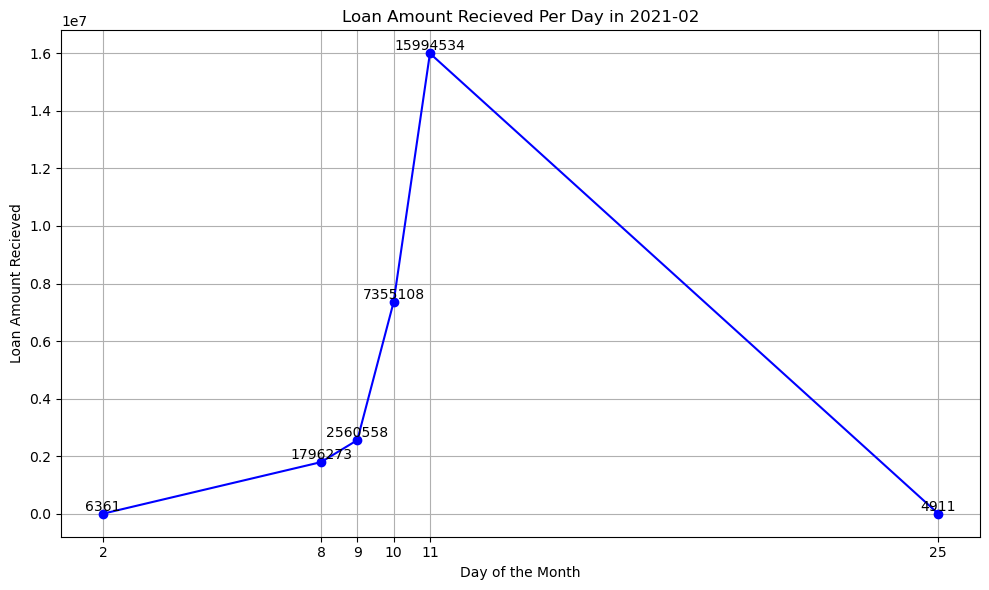

Loan amount recieved in 2021-03:
issue_date
8      2772423
9      2938047
10     8293067
11    18260863
Name: total_payment, dtype: int64


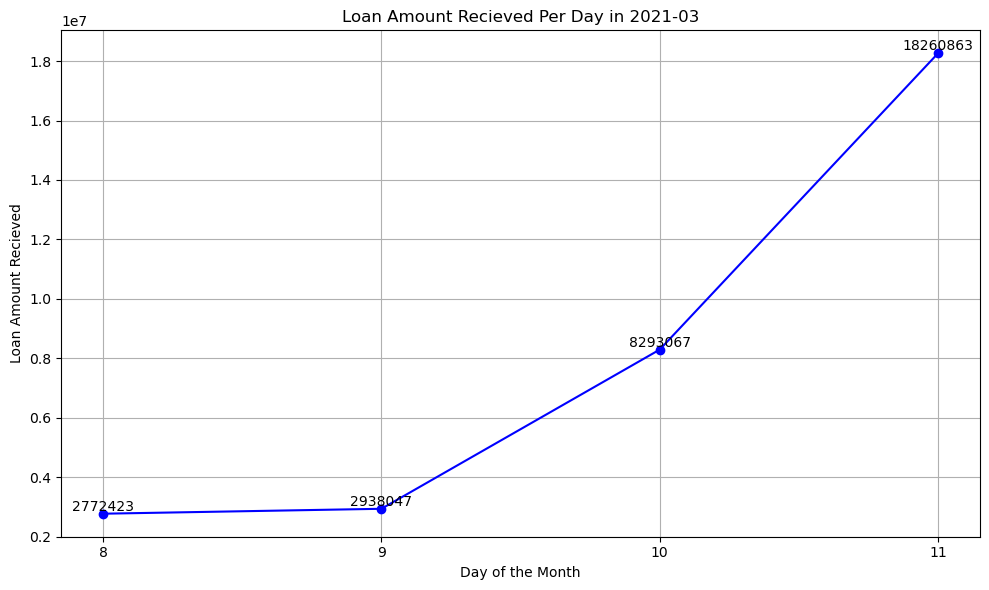

Loan amount recieved in 2021-04:
issue_date
8      1133637
9      2856739
10     9402459
11    19102698
Name: total_payment, dtype: int64


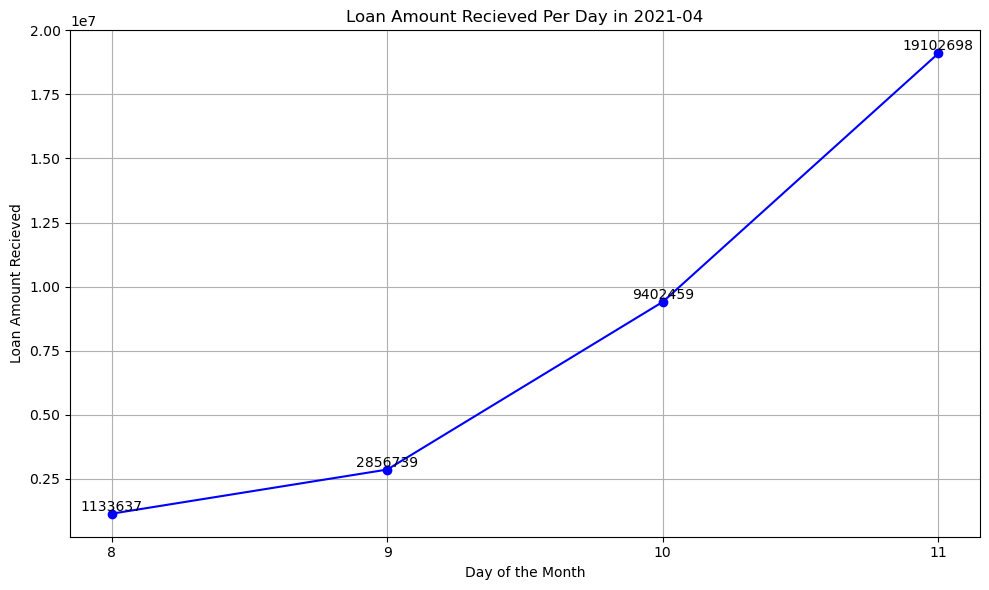

Loan amount recieved in 2021-05:
issue_date
8       414765
9      3275637
10    10124981
11    19935140
Name: total_payment, dtype: int64


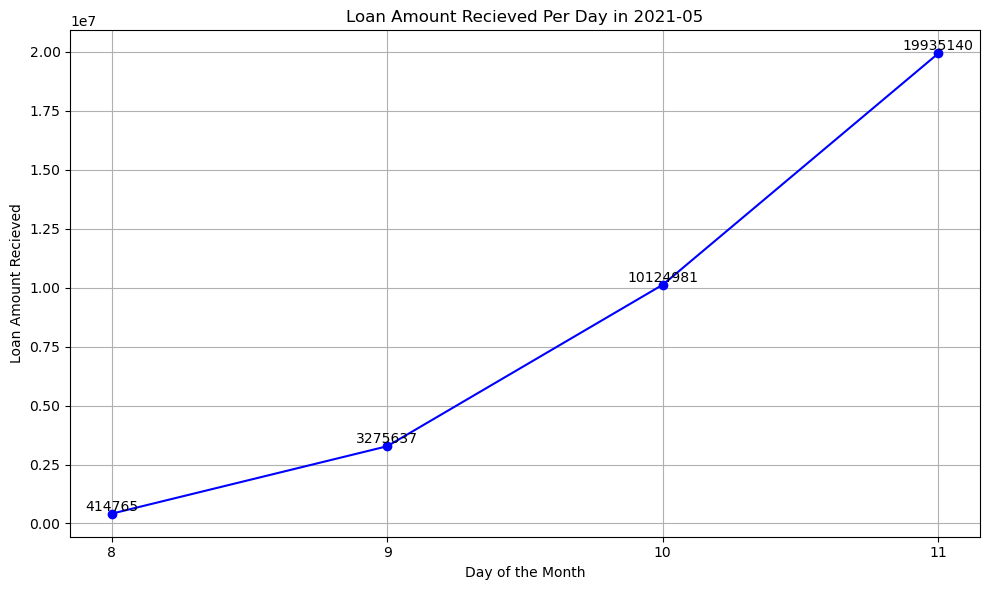

Loan amount recieved in 2021-06:
issue_date
7         9195
8       401158
9      3431994
10    10427535
11    21894651
Name: total_payment, dtype: int64


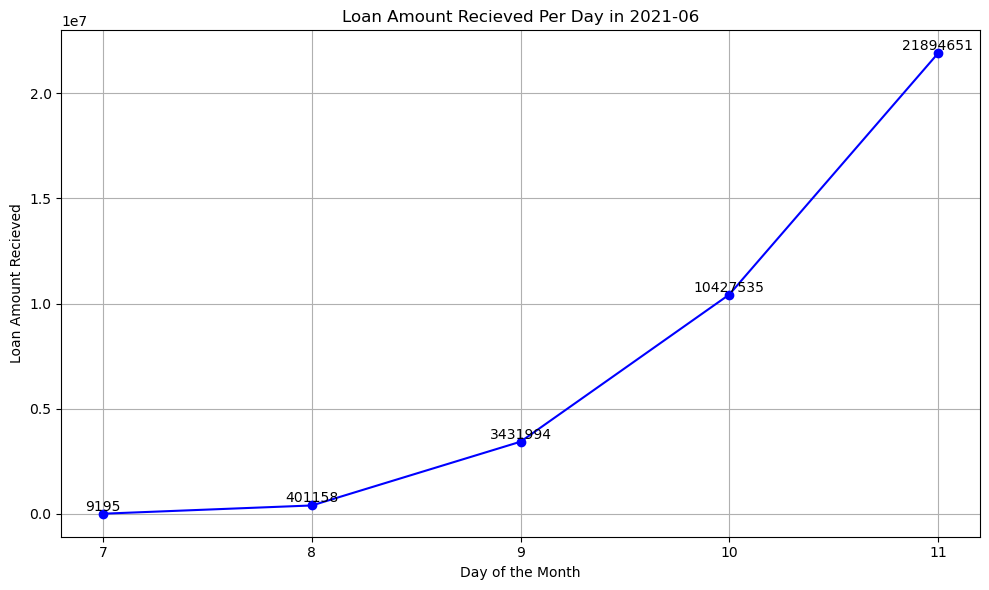

Loan amount recieved in 2021-07:
issue_date
7       195050
8       477496
9      3794371
10    12130510
11    22214879
17        8637
22        6277
Name: total_payment, dtype: int64


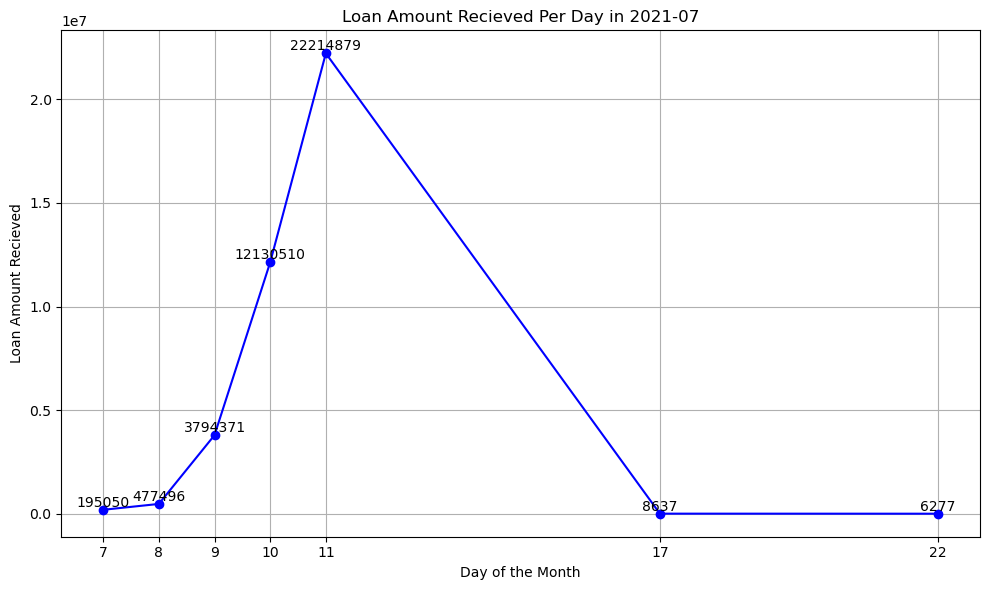

Loan amount recieved in 2021-08:
issue_date
7       219890
8       350697
9      4297594
10    12580884
11    25233153
Name: total_payment, dtype: int64


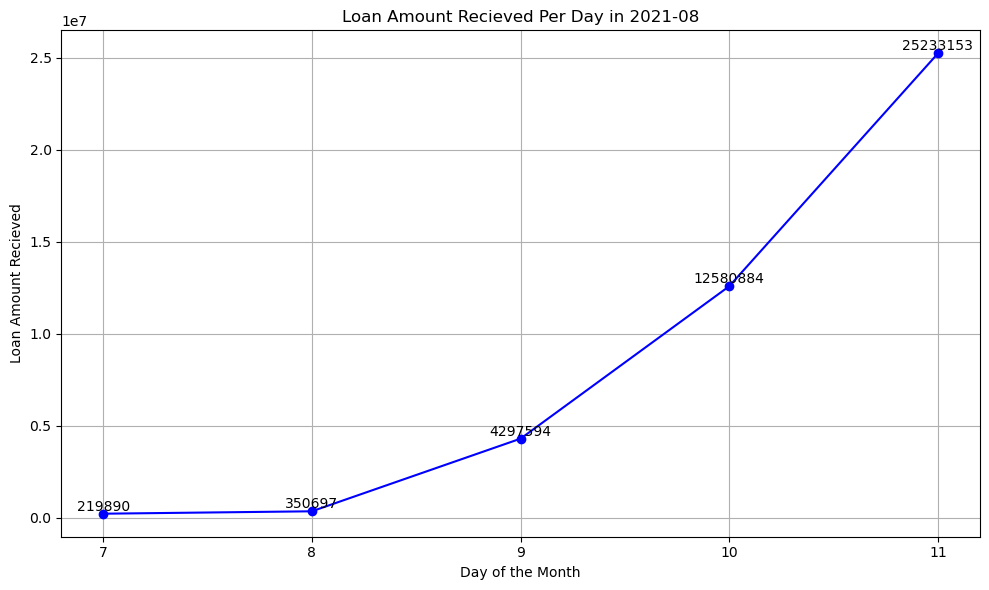

Loan amount recieved in 2021-09:
issue_date
2         8650
7       153415
8       162182
9      4936056
10    12220209
11    26503436
Name: total_payment, dtype: int64


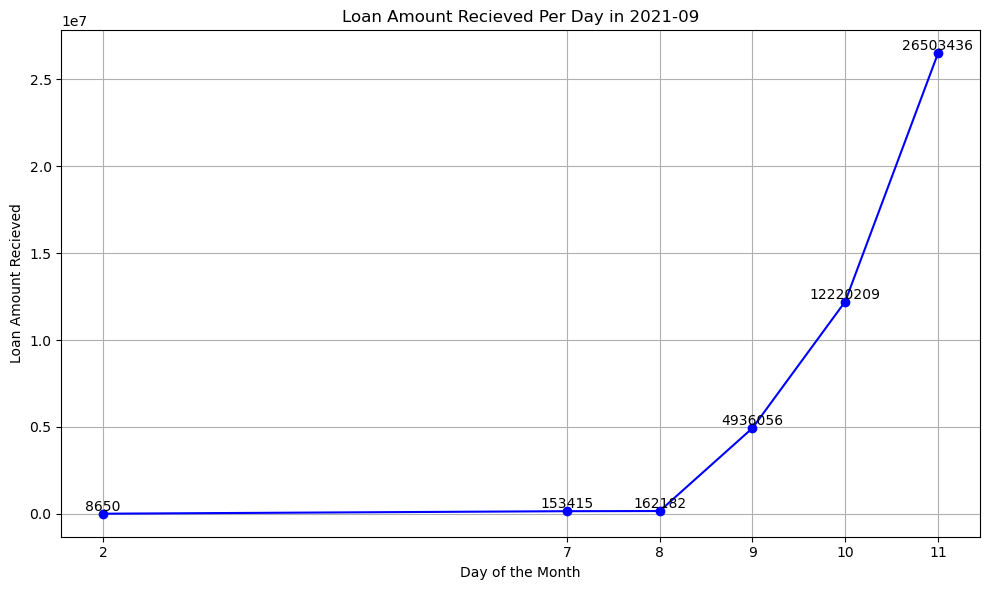

Loan amount recieved in 2021-10:
issue_date
7       295464
8       795356
9      5985969
10    12836842
11    29485936
Name: total_payment, dtype: int64


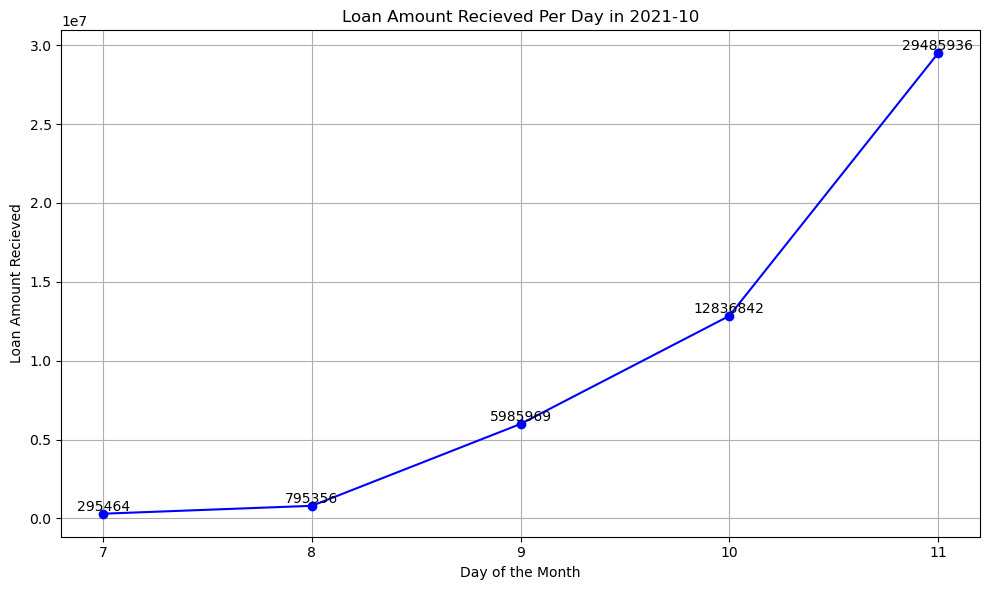

Loan amount recieved in 2021-11:
issue_date
7       373985
8      1667702
9      6658620
10    11622563
11    29801942
19        7218
Name: total_payment, dtype: int64


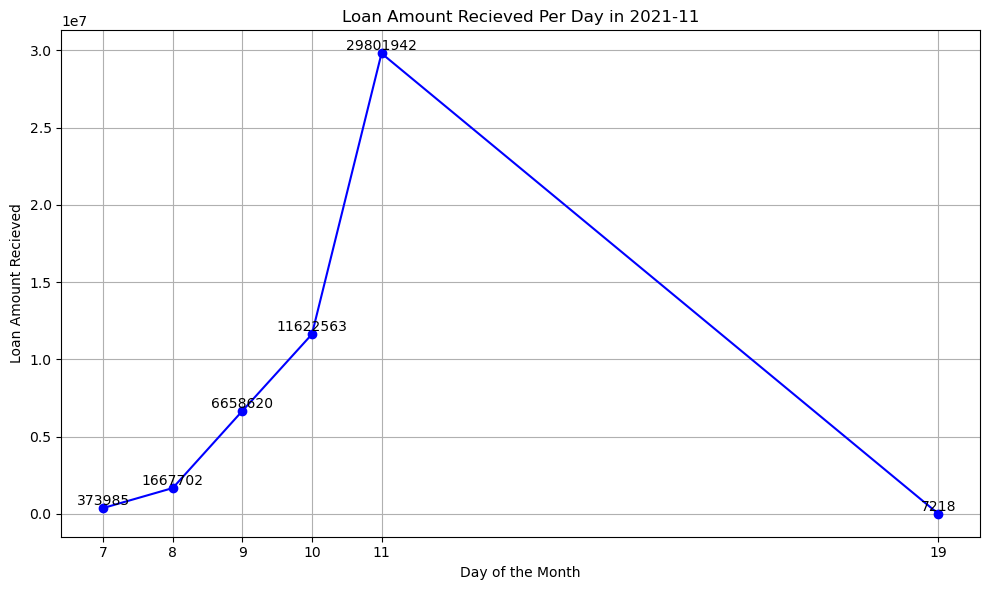

Loan amount recieved in 2021-12:
issue_date
2         3538
7       965691
8      2299219
9      7221725
10    14010631
11    33567713
12        5863
Name: total_payment, dtype: int64


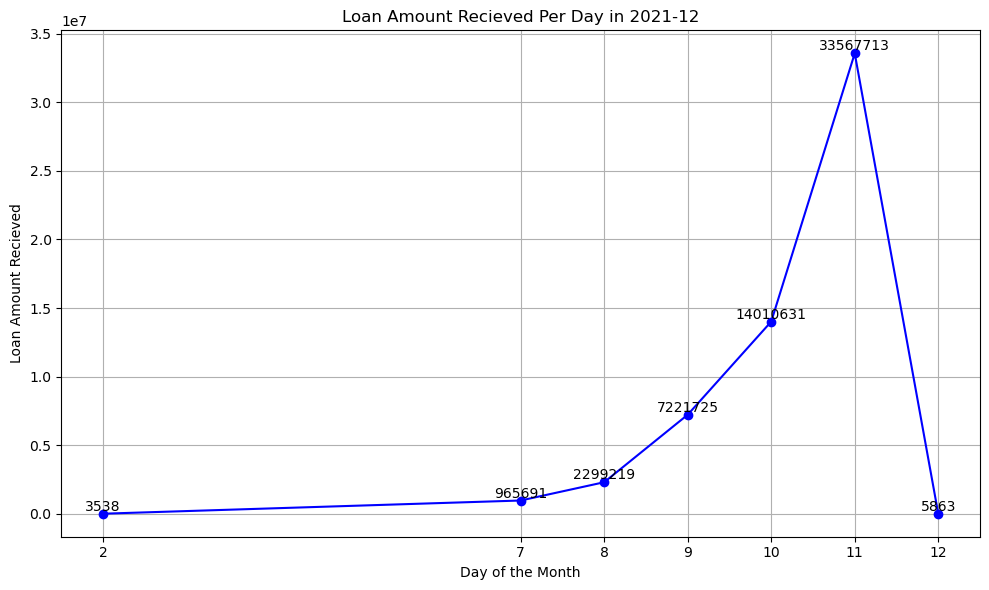

In [49]:
for i in range(1,13):
    # Specify the particular month and year (for example, September 2023)
    month = i   # September
    year = 2021 

    # Filter the DataFrame for the specified month and year
    df_filtered = df[(df['issue_date'].dt.month == month) & (df['issue_date'].dt.year == year)]

    # Group by day and count loan applications issued on each day
    daily_amount_recieved = df_filtered.groupby(df_filtered['issue_date'].dt.day)['total_payment'].sum()

    # Output the result
    print(f"Loan amount recieved in {year}-{month:02d}:")
    print(daily_amount_recieved)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_amount_recieved.index, daily_amount_recieved.values, marker='o', linestyle='-', color='b')

    # Annotate each point with the total number of loan applications
    for i, value in enumerate(daily_amount_recieved):
        plt.text(daily_amount_recieved.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Add titles and labels
    plt.title(f'Loan Amount Recieved Per Day in {year}-{month:02d}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Loan Amount Recieved')
    plt.grid(True)
    plt.xticks(daily_amount_recieved.index)  # Show the day on the x-axis
    plt.tight_layout()

    # Show the plot
    plt.show()

**Month-over-Month(MoM) Changes in Amount Recieved**


Month-over-Month Changes (%):
issue_date
February      0.503680
March        16.403409
April         0.716372
May           3.862039
June          7.152511
July          7.362703
August        9.928596
September     3.049818
October      12.312717
November      1.482732
December     15.842865
Name: total_payment, dtype: float64


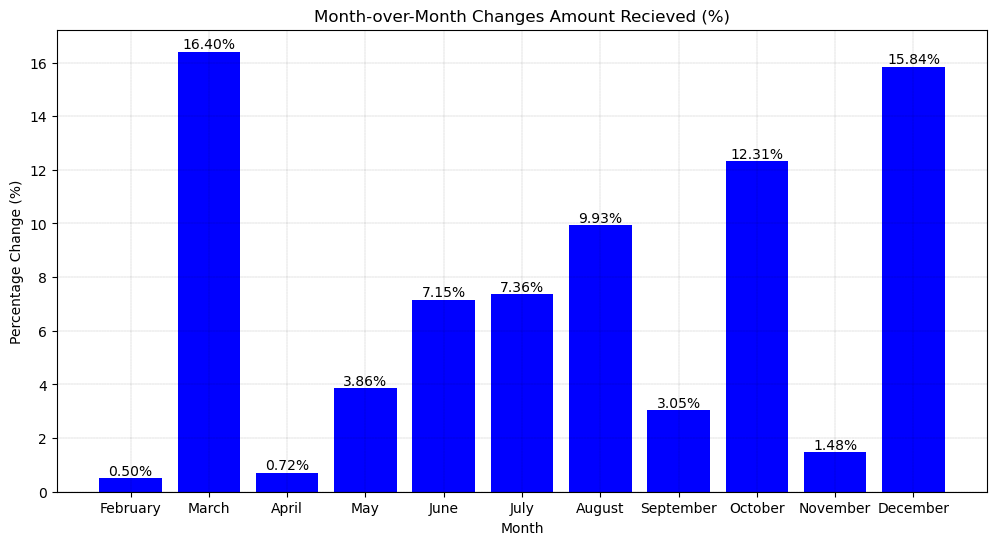

In [55]:
# Group by year and month, and count loan applications
monthly_amount_recieved = df.groupby(df['issue_date'].dt.to_period('M'))['total_payment'].sum()

# Calculate month-over-month changes
mar_changes = monthly_amount_recieved.pct_change() * 100  # Change to percentage

# Convert period index to string month names
mar_changes.index = mar_changes.index.strftime('%B')
mar_changes = mar_changes.dropna()

# Output the results
print("\nMonth-over-Month Changes (%):")
print(mar_changes)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(mar_changes.index, mar_changes.values, color='blue')
plt.title('Month-over-Month Changes Amount Recieved (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

# 4. Average Interest Rate

In [57]:
average_interest_rate = df['int_rate'].mean()
print("Average Interest Rate : ",average_interest_rate)

Average Interest Rate :  0.12048831397760265


**MTD (Month-to-Date) Average Interest Rate**

Total Amount Recieved per Month:
issue_date
January      0.114619
February     0.117216
March        0.118583
April        0.117409
May          0.122578
June         0.122742
July         0.122372
August       0.123002
September    0.120032
October      0.120241
November     0.119417
December     0.123560
Name: int_rate, dtype: float64
0.12014778415571635


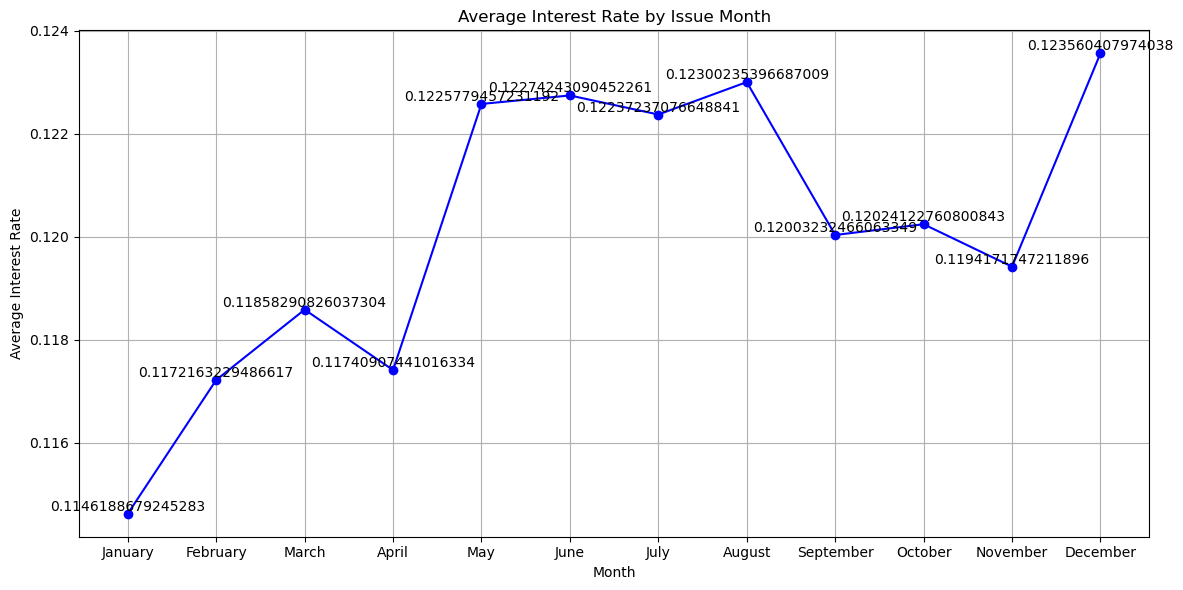

In [62]:
monthly_average_interest_rate = df.groupby(df['issue_date'].dt.to_period('M'))['int_rate'].mean()
# Sort the index by calendar month order (optional step for better ordering)
monthly_average_interest_rate.index = monthly_average_interest_rate.index.strftime('%B')

# Print the monthly funded amounts
print("Total Amount Recieved per Month:")
print(monthly_average_interest_rate)
print(monthly_average_interest_rate.mean())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_average_interest_rate.index, monthly_average_interest_rate.values, marker='o', color='b')

# Annotate each point with the total number of loan applications
for i, value in enumerate(monthly_average_interest_rate):
    plt.text(monthly_average_interest_rate.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Average Interest Rate by Issue Month')
plt.xlabel('Month')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Average Interest Rate in 2021-01:
issue_date
1     0.123350
5     0.159600
8     0.105454
9     0.121494
10    0.121545
11    0.111493
Name: int_rate, dtype: float64


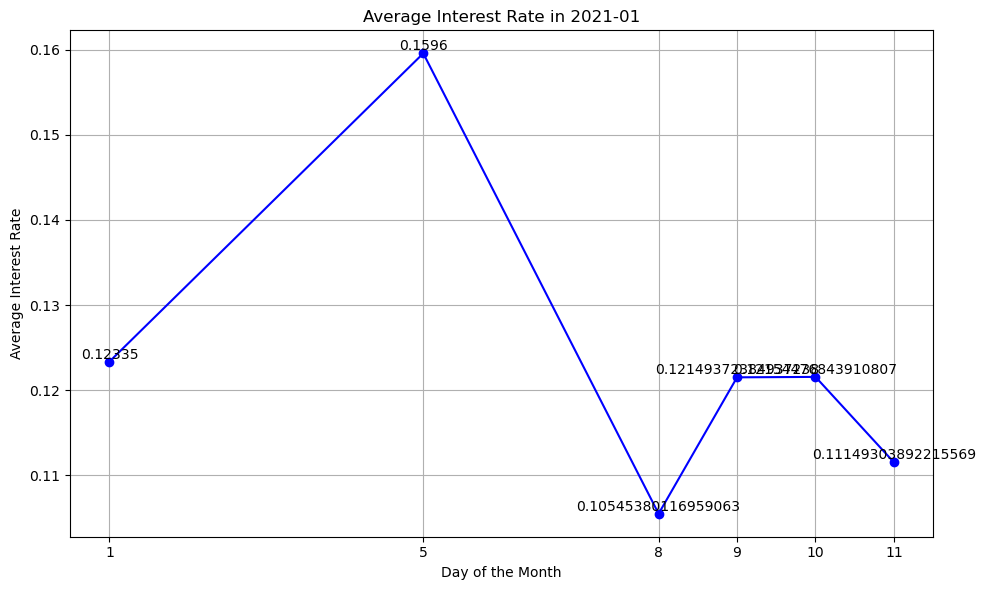

Average Interest Rate in 2021-02:
issue_date
2     0.162900
8     0.107425
9     0.126339
10    0.115630
11    0.117412
25    0.106500
Name: int_rate, dtype: float64


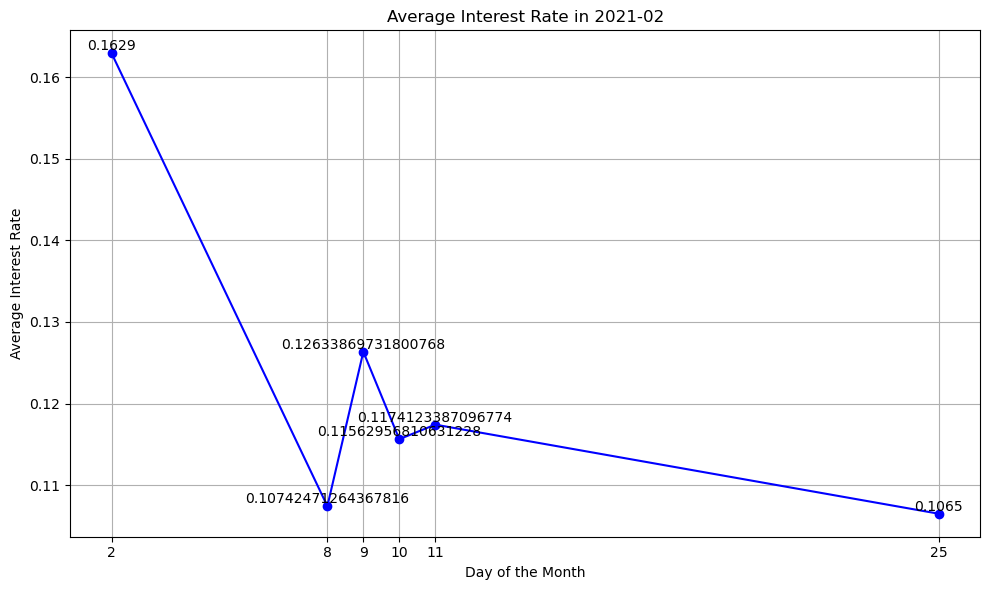

Average Interest Rate in 2021-03:
issue_date
8     0.111437
9     0.125040
10    0.116074
11    0.119802
Name: int_rate, dtype: float64


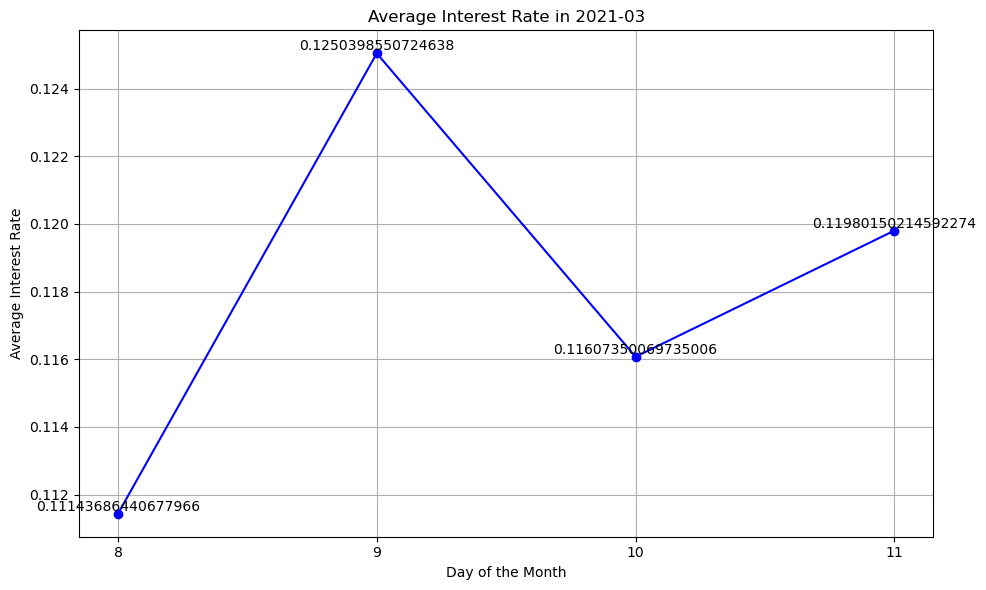

Average Interest Rate in 2021-04:
issue_date
8     0.110783
9     0.122656
10    0.116113
11    0.117777
Name: int_rate, dtype: float64


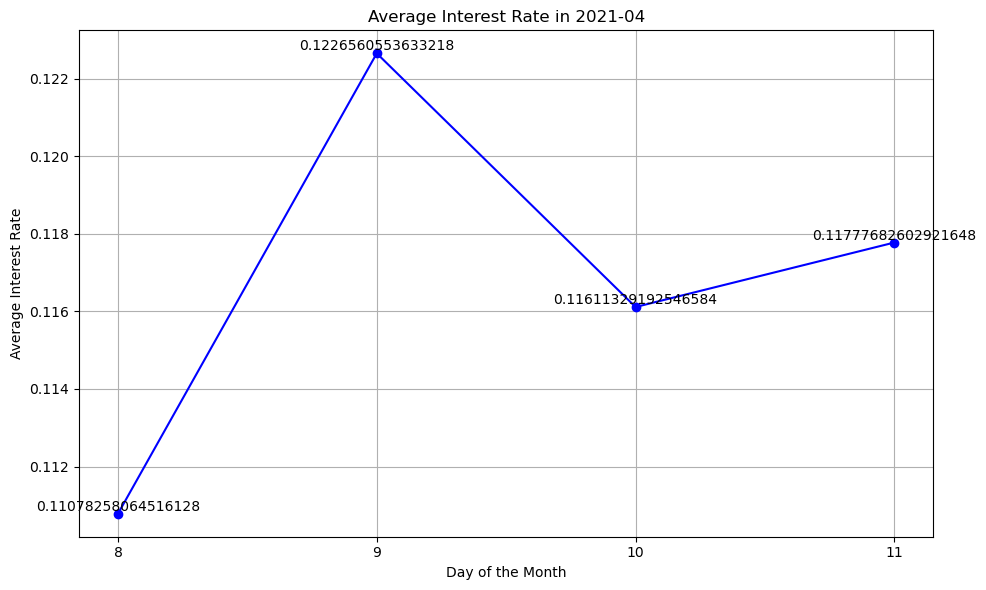

Average Interest Rate in 2021-05:
issue_date
8     0.104706
9     0.119932
10    0.118075
11    0.126341
Name: int_rate, dtype: float64


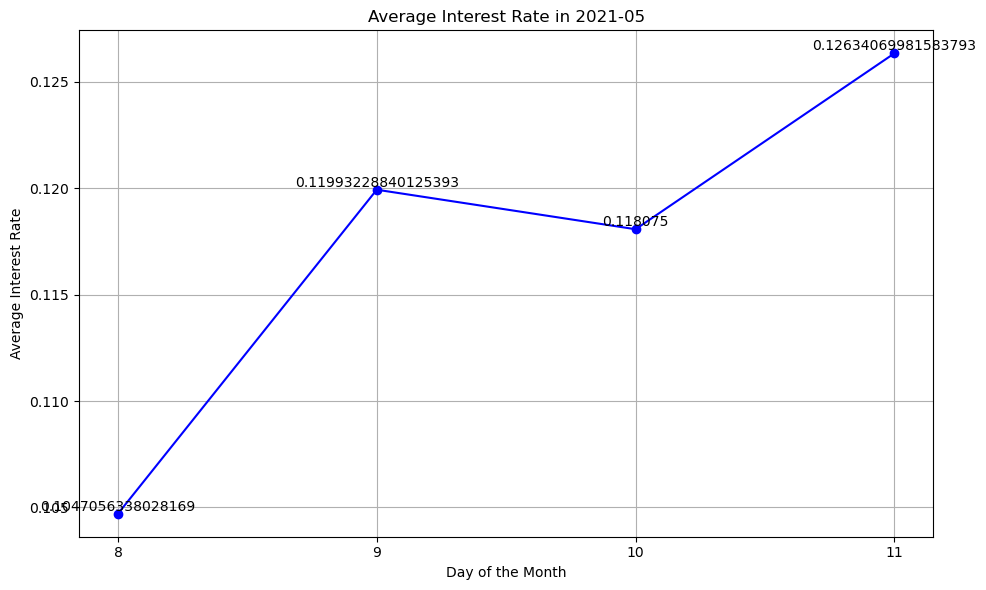

Average Interest Rate in 2021-06:
issue_date
7     0.137500
8     0.106139
9     0.117765
10    0.123941
11    0.123676
Name: int_rate, dtype: float64


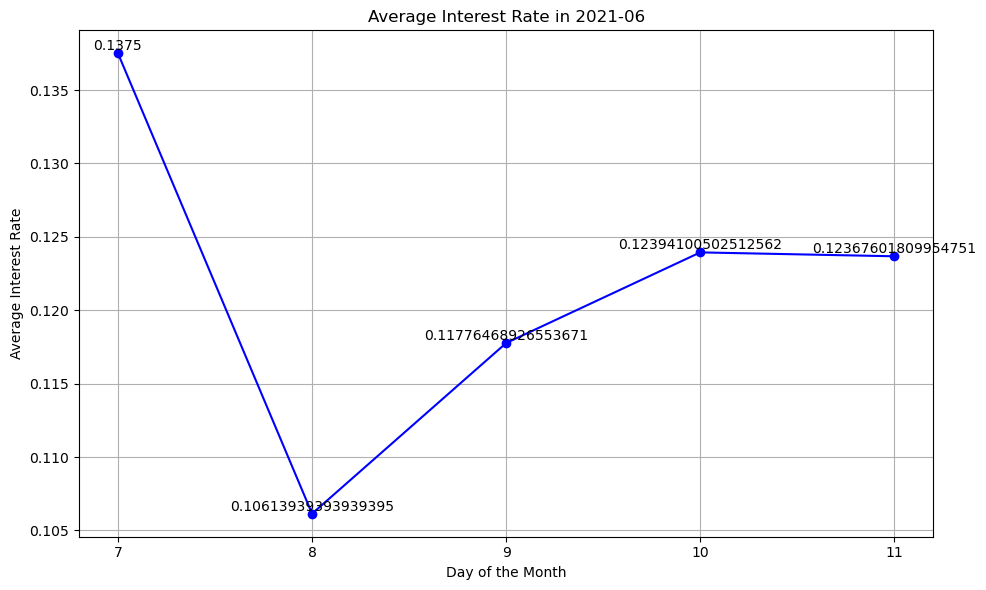

Average Interest Rate in 2021-07:
issue_date
7     0.092547
8     0.107569
9     0.120015
10    0.121910
11    0.124319
17    0.146500
22    0.126900
Name: int_rate, dtype: float64


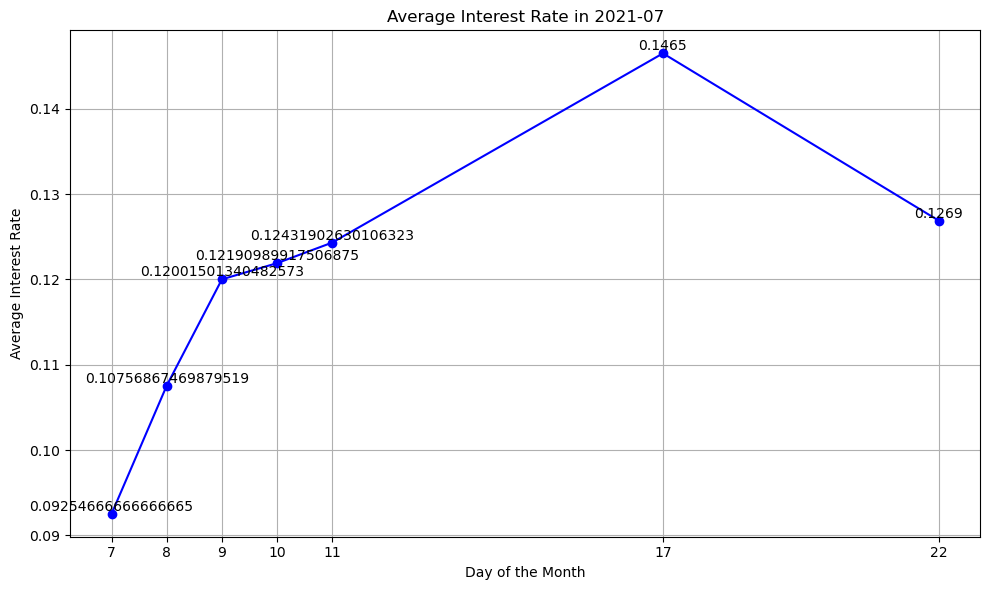

Average Interest Rate in 2021-08:
issue_date
7     0.102948
8     0.115851
9     0.119991
10    0.127455
11    0.121772
Name: int_rate, dtype: float64


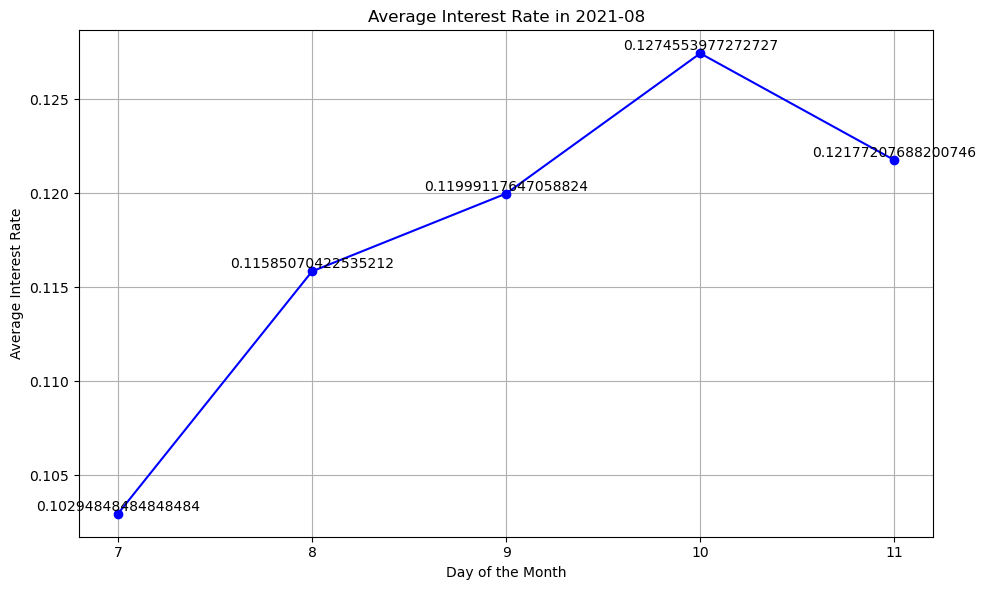

Average Interest Rate in 2021-09:
issue_date
2     0.089000
7     0.100839
8     0.109609
9     0.120678
10    0.124144
11    0.118048
Name: int_rate, dtype: float64


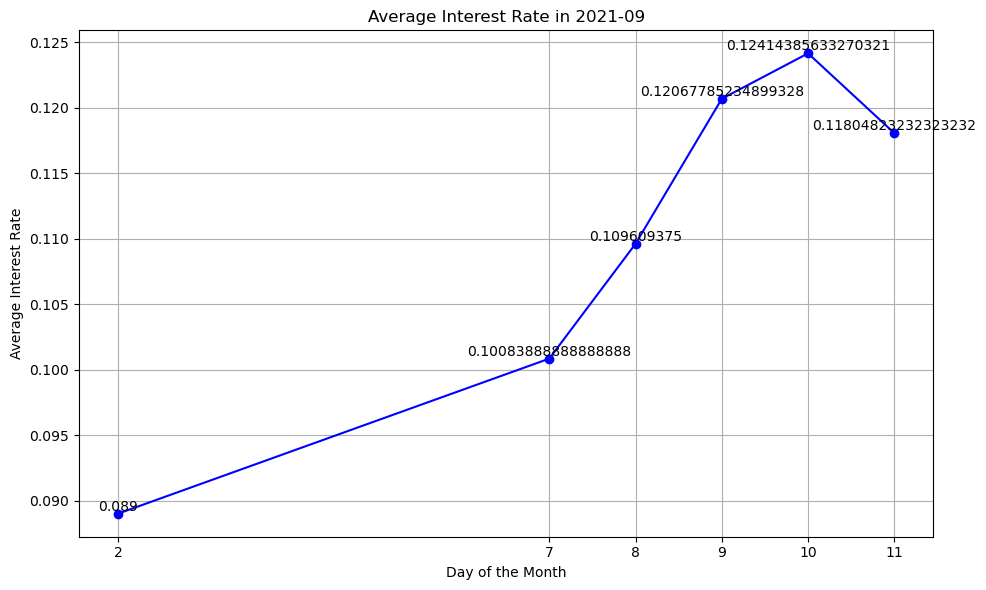

Average Interest Rate in 2021-10:
issue_date
7     0.108068
8     0.112496
9     0.123648
10    0.116634
11    0.121903
Name: int_rate, dtype: float64


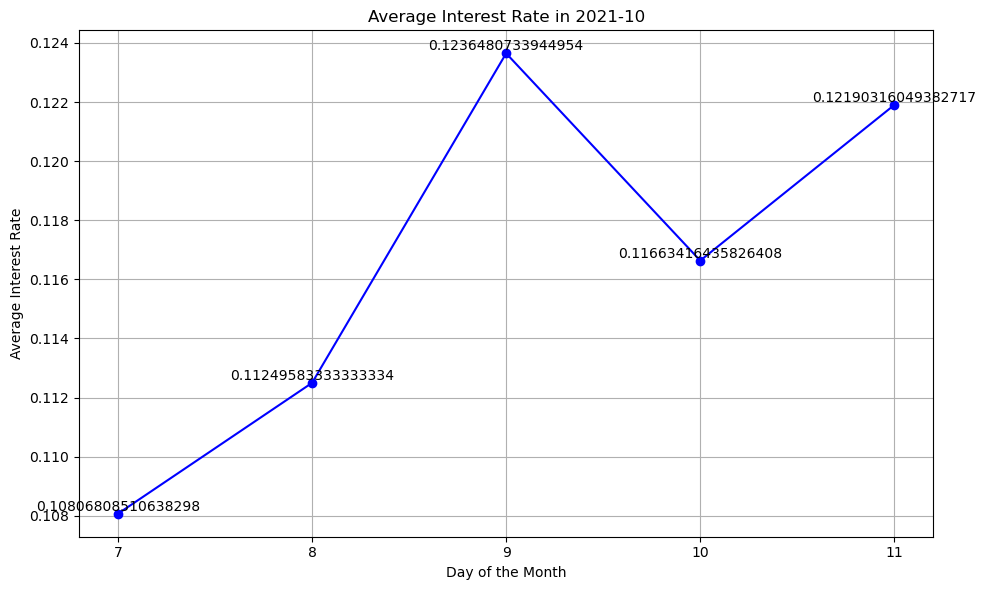

Average Interest Rate in 2021-11:
issue_date
7     0.097986
8     0.116576
9     0.122987
10    0.105703
11    0.126103
19    0.142700
Name: int_rate, dtype: float64


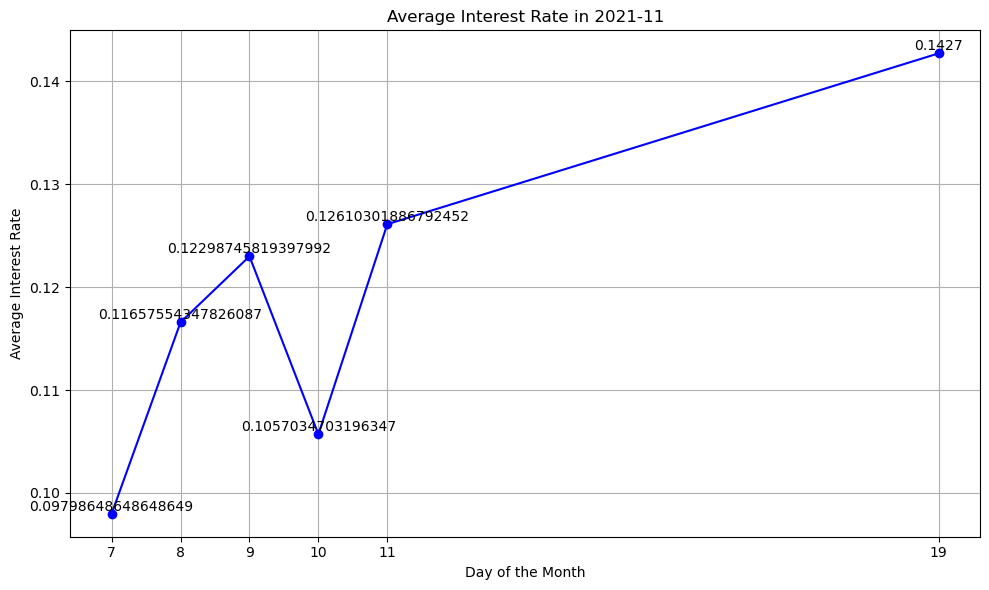

Average Interest Rate in 2021-12:
issue_date
2     0.099100
7     0.106592
8     0.119504
9     0.122230
10    0.107554
11    0.133938
12    0.106500
Name: int_rate, dtype: float64


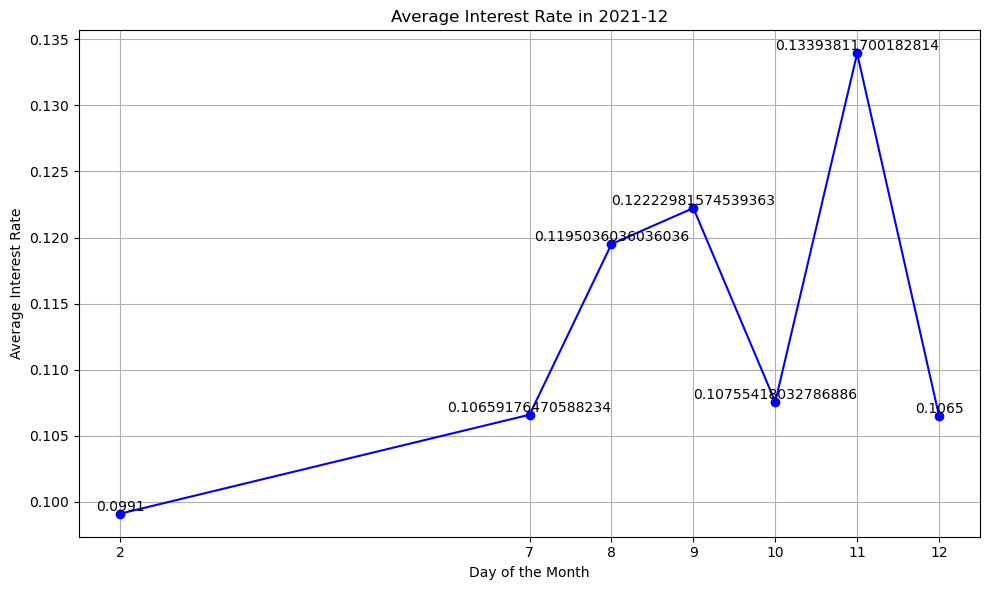

In [68]:
for i in range(1,13):
    # Specify the particular month and year (for example, September 2023)
    month = i   # September
    year = 2021 

    # Filter the DataFrame for the specified month and year
    df_filtered = df[(df['issue_date'].dt.month == month) & (df['issue_date'].dt.year == year)]

    # Group by day and count loan applications issued on each day
    daily_average_interest_rate = df_filtered.groupby(df_filtered['issue_date'].dt.day)['int_rate'].mean()

    # Output the result
    print(f"Average Interest Rate in {year}-{month:02d}:")
    print(daily_average_interest_rate)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_average_interest_rate.index, daily_average_interest_rate.values, marker='o', linestyle='-', color='b')

    # Annotate each point with the total number of loan applications
    for i, value in enumerate(daily_average_interest_rate):
        plt.text(daily_average_interest_rate.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Add titles and labels
    plt.title(f'Average Interest Rate in {year}-{month:02d}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Average Interest Rate')
    plt.grid(True)
    plt.xticks(daily_average_interest_rate.index)  # Show the day on the x-axis
    plt.tight_layout()

    # Show the plot
    plt.show()

**Month-over-Month (MoM) Changes in Interest Rate**


Month-over-Month Changes (%):
issue_date
February     2.266167
March        1.165866
April       -0.989885
May          4.402446
June         0.134188
July        -0.301493
August       0.514808
September   -2.414612
October      0.174039
November    -0.685333
December     3.469546
Name: int_rate, dtype: float64


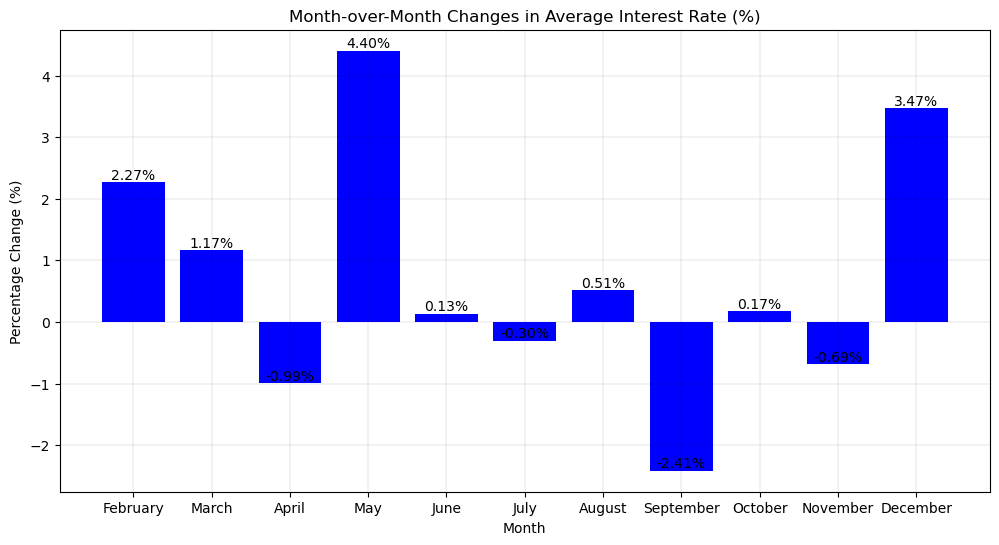

In [71]:
# Group by year and month, and count loan applications
monthly_average_interest_rate = df.groupby(df['issue_date'].dt.to_period('M'))['int_rate'].mean()

# Calculate month-over-month changes
mair_changes = monthly_average_interest_rate.pct_change() * 100  # Change to percentage

# Convert period index to string month names
mair_changes.index = mair_changes.index.strftime('%B')
mair_changes = mair_changes.dropna()

# Output the results
print("\nMonth-over-Month Changes (%):")
print(mair_changes)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(mair_changes.index, mair_changes.values, color='blue')
plt.title('Month-over-Month Changes in Average Interest Rate (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

# 5. Average Debt-to-Income Ratio (DTI)

In [76]:
average_dti = df['dti'].mean()
print("Average Debt-to-Income Ratio (DTI) : ",average_dti)

Average Debt-to-Income Ratio (DTI) :  0.13327433119037743


**Month-to-Date(MTD) Average DTI**

Total Amount Recieved per Month:
issue_date
January      0.129370
February     0.134093
March        0.132156
April        0.132194
May          0.133337
June         0.132438
July         0.132948
August       0.133532
September    0.132978
October      0.134144
November     0.133027
December     0.136655
Name: dti, dtype: float64
0.13307280283005243


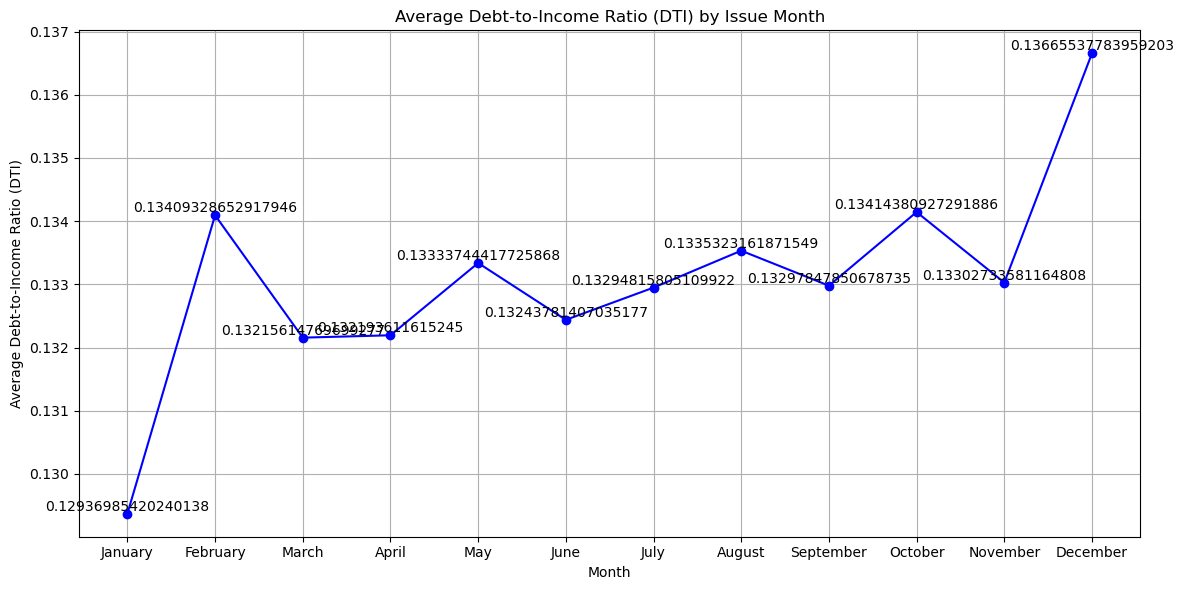

In [79]:
monthly_average_dti = df.groupby(df['issue_date'].dt.to_period('M'))['dti'].mean()
# Sort the index by calendar month order (optional step for better ordering)
monthly_average_dti.index = monthly_average_dti.index.strftime('%B')

# Print the monthly funded amounts
print("Total Amount Recieved per Month:")
print(monthly_average_dti)
print(monthly_average_dti.mean())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_average_dti.index, monthly_average_dti.values, marker='o', color='b')

# Annotate each point with the total number of loan applications
for i, value in enumerate(monthly_average_dti):
    plt.text(monthly_average_dti.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Average Debt-to-Income Ratio (DTI) by Issue Month')
plt.xlabel('Month')
plt.ylabel('Average Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Average Debt-to-Income Ratio (DTI) in 2021-01:
issue_date
1     0.038300
5     0.208800
8     0.113440
9     0.118333
10    0.123427
11    0.136053
Name: dti, dtype: float64


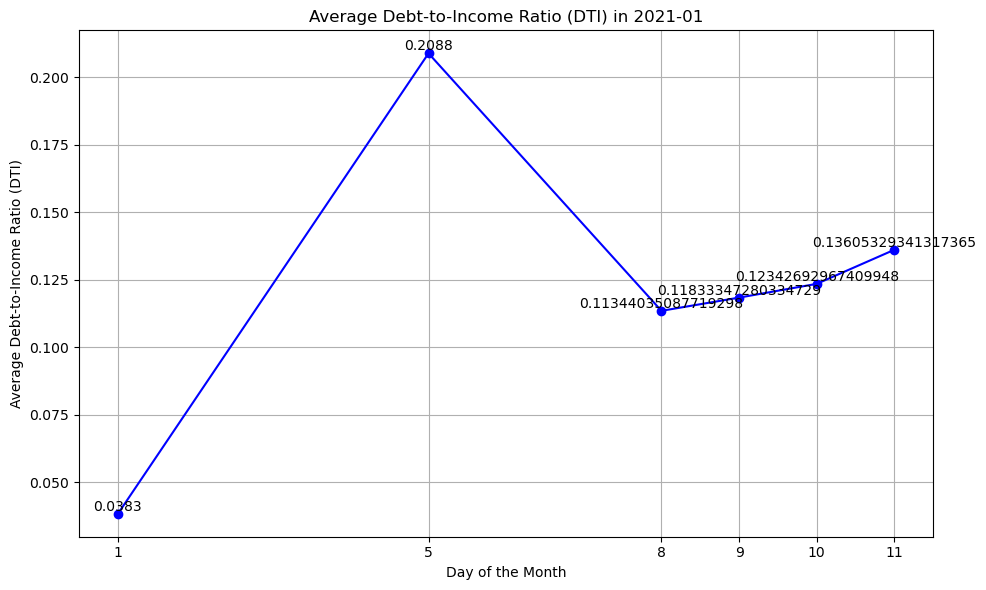

Average Debt-to-Income Ratio (DTI) in 2021-02:
issue_date
2     0.095700
8     0.112210
9     0.131951
10    0.133525
11    0.137986
25    0.054000
Name: dti, dtype: float64


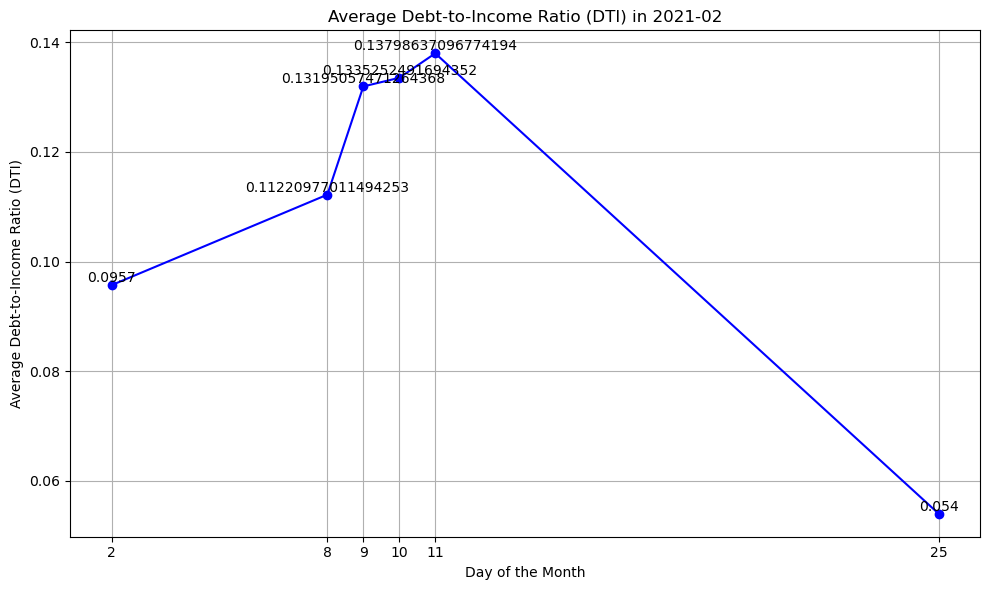

Average Debt-to-Income Ratio (DTI) in 2021-03:
issue_date
8     0.113803
9     0.123363
10    0.133566
11    0.136267
Name: dti, dtype: float64


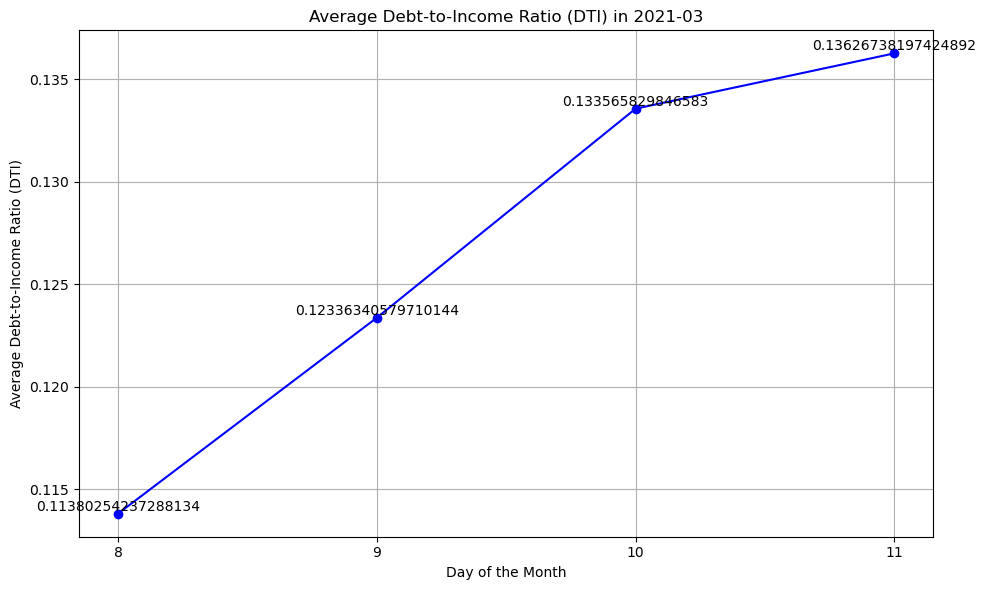

Average Debt-to-Income Ratio (DTI) in 2021-04:
issue_date
8     0.131735
9     0.113382
10    0.127090
11    0.138579
Name: dti, dtype: float64


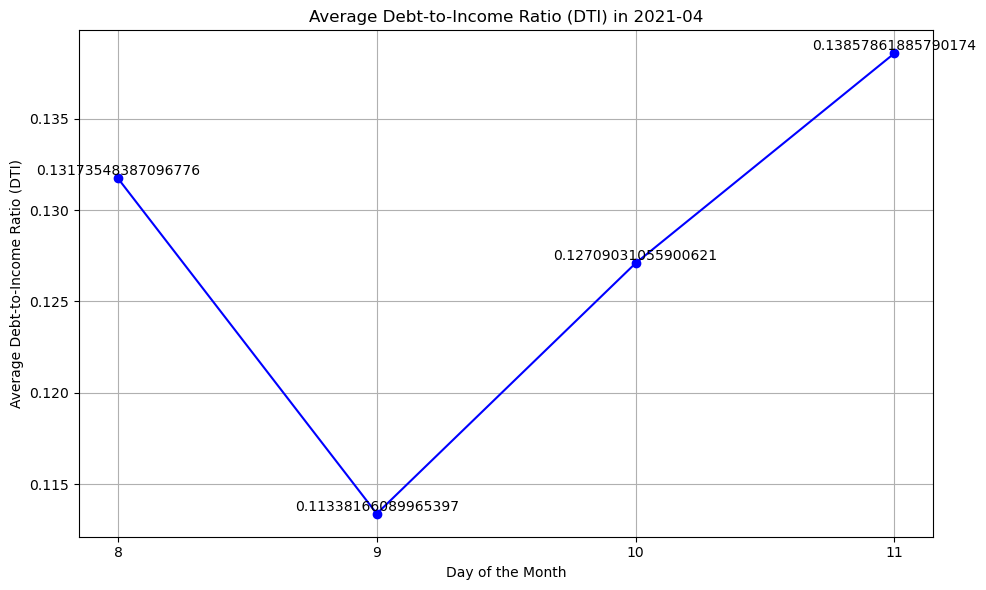

Average Debt-to-Income Ratio (DTI) in 2021-05:
issue_date
8     0.130111
9     0.124051
10    0.131130
11    0.136505
Name: dti, dtype: float64


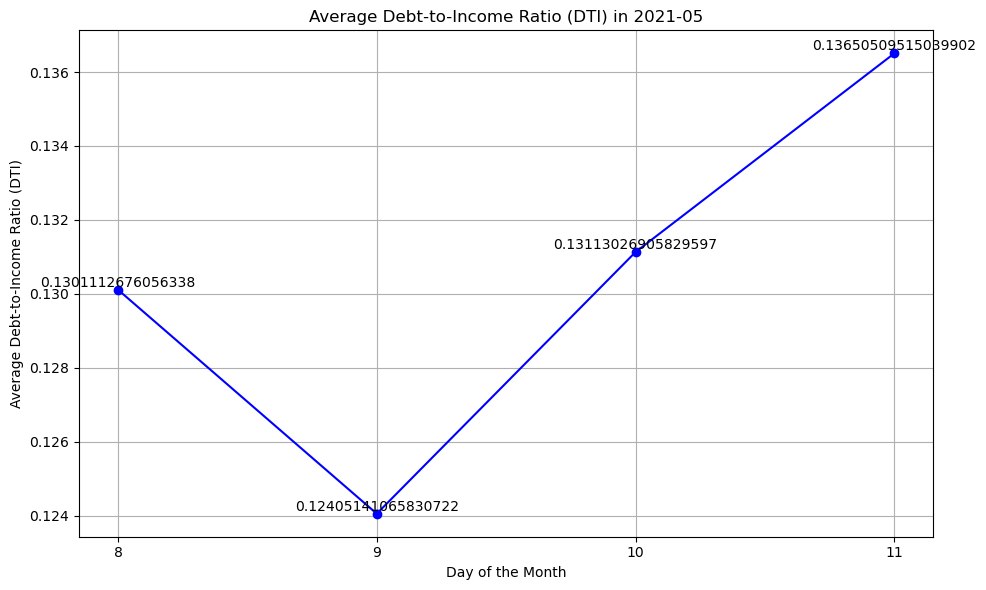

Average Debt-to-Income Ratio (DTI) in 2021-06:
issue_date
7     0.142900
8     0.109059
9     0.120799
10    0.127644
11    0.138333
Name: dti, dtype: float64


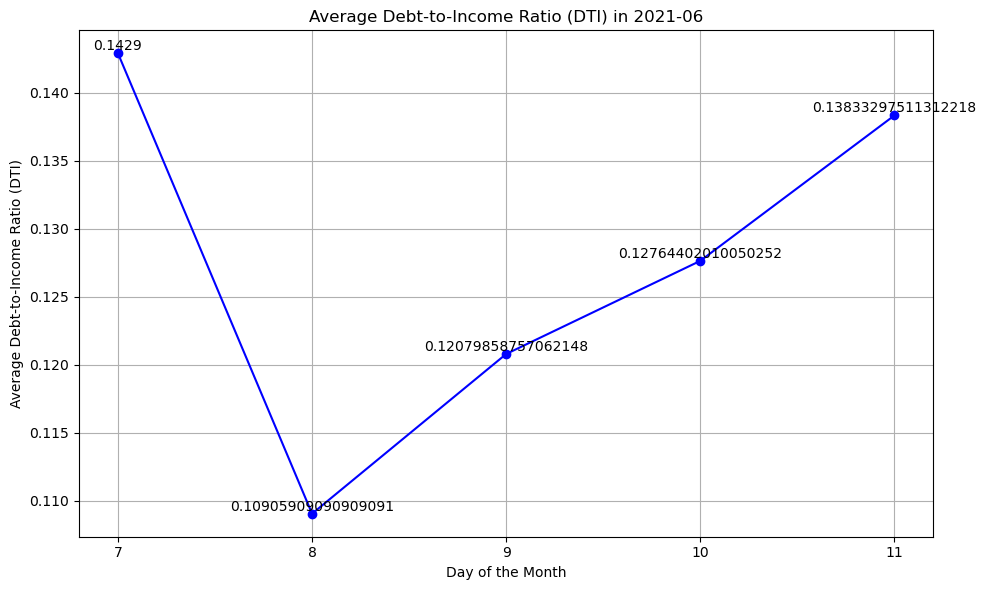

Average Debt-to-Income Ratio (DTI) in 2021-07:
issue_date
7     0.074993
8     0.118849
9     0.125421
10    0.129353
11    0.138371
17    0.126000
22    0.088000
Name: dti, dtype: float64


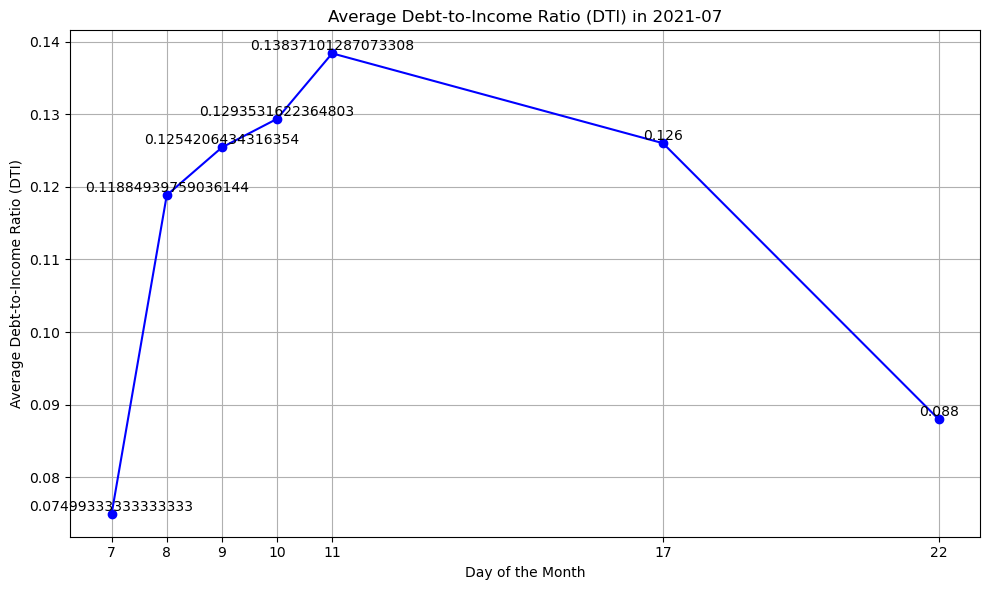

Average Debt-to-Income Ratio (DTI) in 2021-08:
issue_date
7     0.097727
8     0.132555
9     0.126997
10    0.132595
11    0.136152
Name: dti, dtype: float64


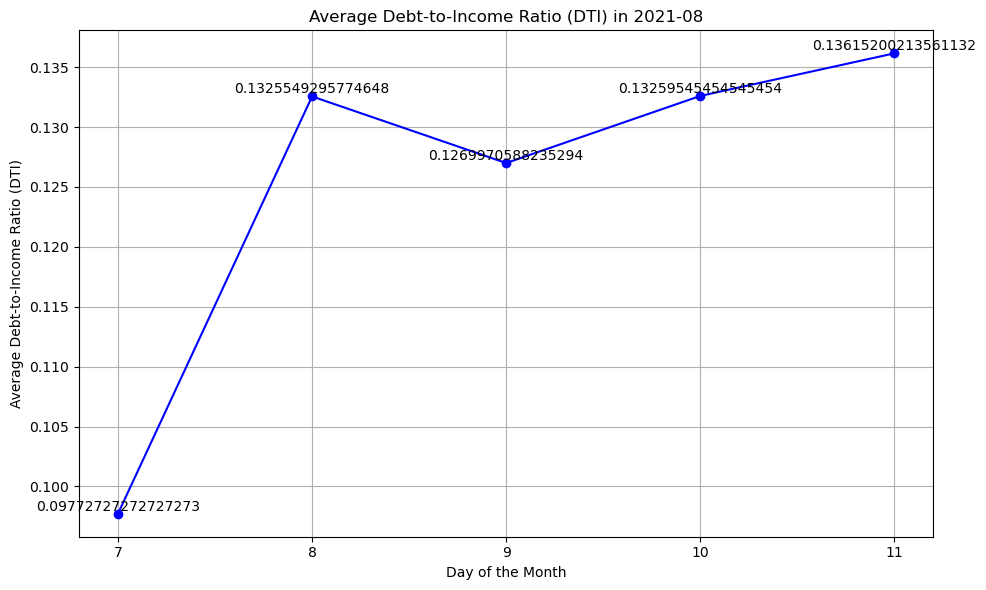

Average Debt-to-Income Ratio (DTI) in 2021-09:
issue_date
2     0.039400
7     0.079067
8     0.115447
9     0.126683
10    0.129973
11    0.136826
Name: dti, dtype: float64


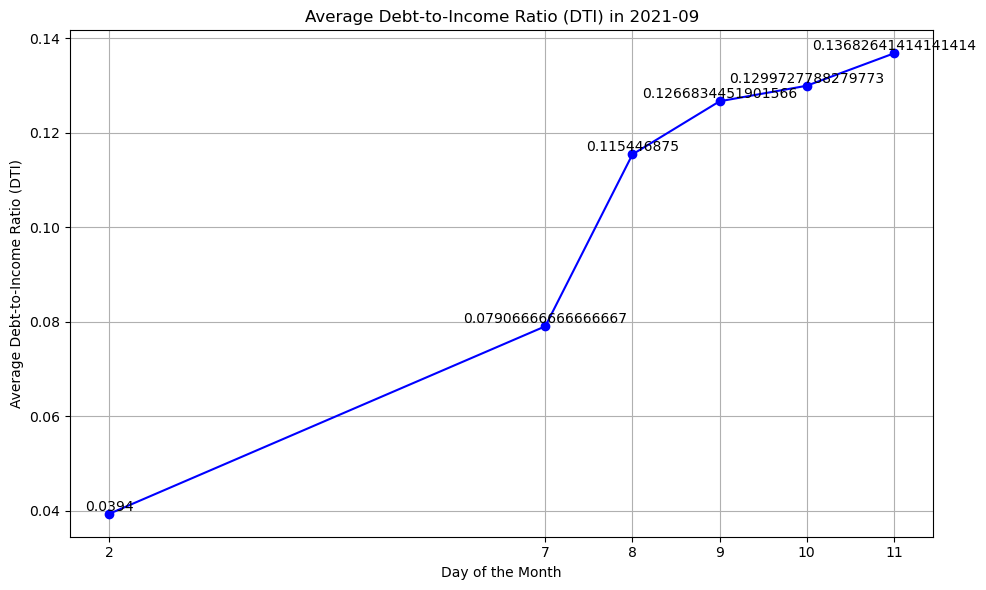

Average Debt-to-Income Ratio (DTI) in 2021-10:
issue_date
7     0.112202
8     0.112410
9     0.127649
10    0.130828
11    0.139205
Name: dti, dtype: float64


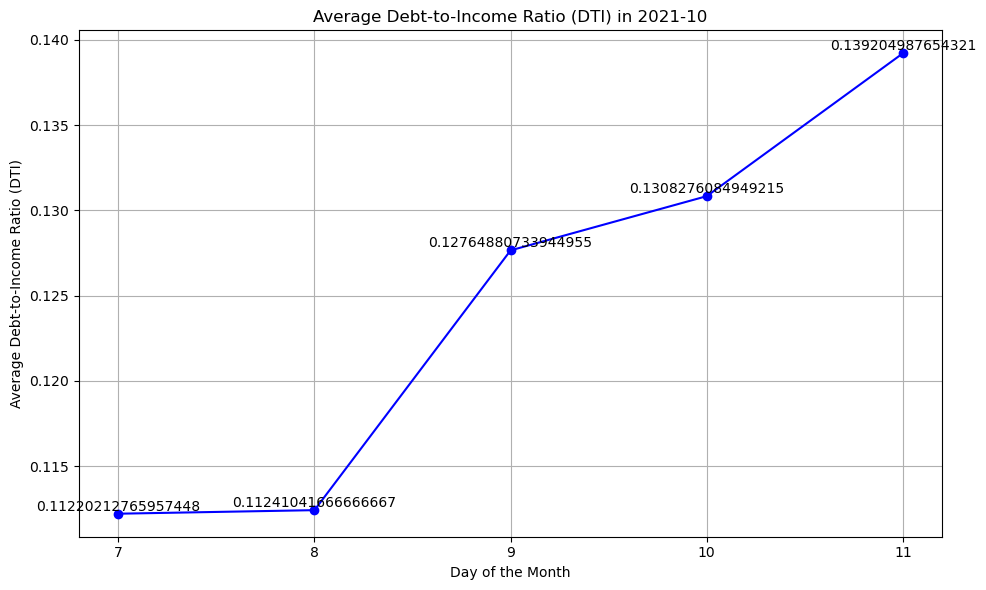

Average Debt-to-Income Ratio (DTI) in 2021-11:
issue_date
7     0.097692
8     0.122940
9     0.121943
10    0.128466
11    0.139949
19    0.245300
Name: dti, dtype: float64


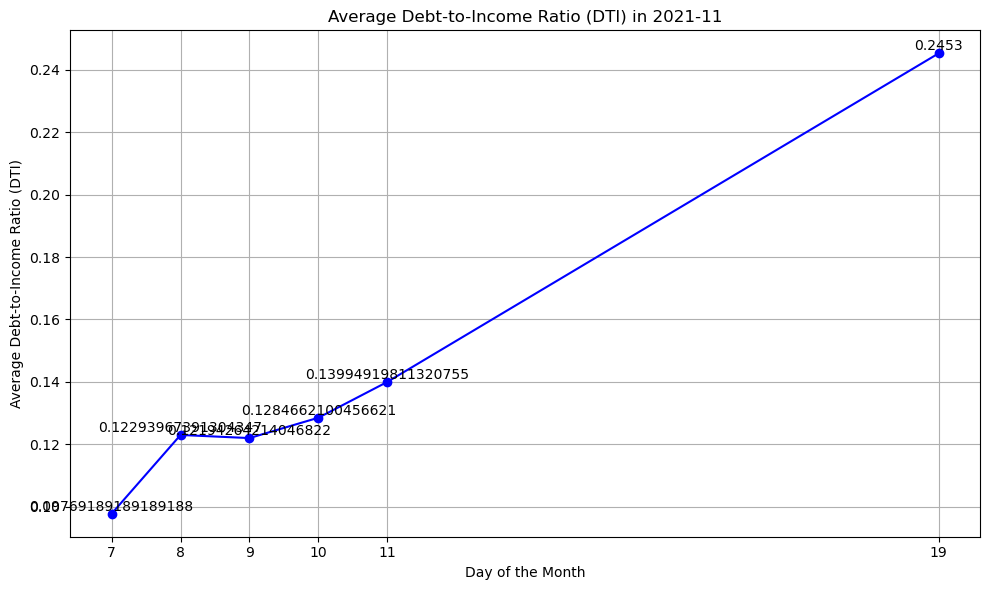

Average Debt-to-Income Ratio (DTI) in 2021-12:
issue_date
2     0.035000
7     0.117080
8     0.128458
9     0.122462
10    0.129714
11    0.146036
12    0.139200
Name: dti, dtype: float64


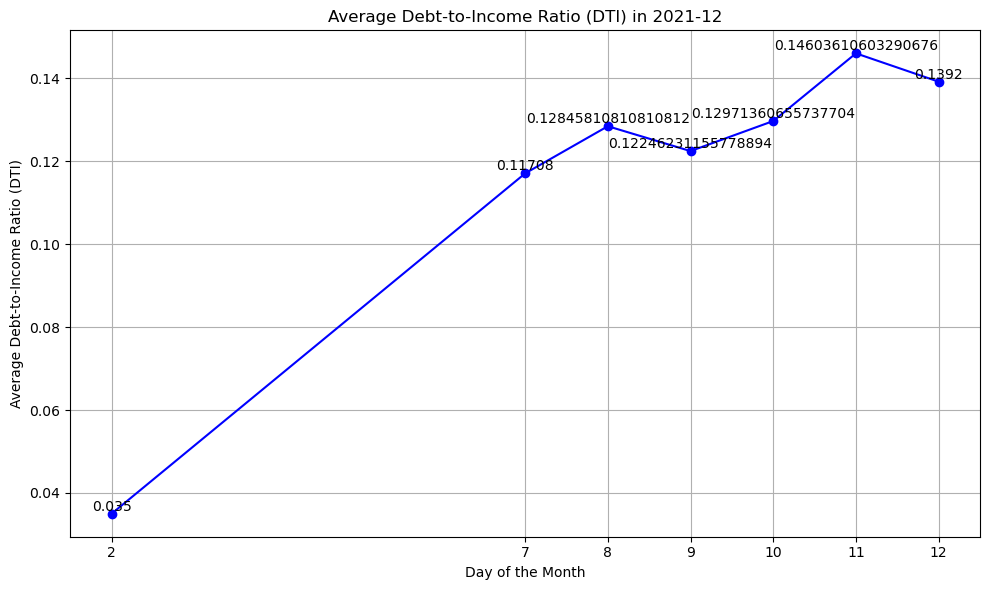

In [81]:
for i in range(1,13):
    # Specify the particular month and year (for example, September 2023)
    month = i   # September
    year = 2021 

    # Filter the DataFrame for the specified month and year
    df_filtered = df[(df['issue_date'].dt.month == month) & (df['issue_date'].dt.year == year)]

    # Group by day and count loan applications issued on each day
    daily_average_dti = df_filtered.groupby(df_filtered['issue_date'].dt.day)['dti'].mean()

    # Output the result
    print(f"Average Debt-to-Income Ratio (DTI) in {year}-{month:02d}:")
    print(daily_average_dti)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot( daily_average_dti.index,  daily_average_dti.values, marker='o', linestyle='-', color='b')

    # Annotate each point with the total number of loan applications
    for i, value in enumerate( daily_average_dti):
        plt.text( daily_average_dti.index[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Add titles and labels
    plt.title(f'Average Debt-to-Income Ratio (DTI) in {year}-{month:02d}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Average Debt-to-Income Ratio (DTI)')
    plt.grid(True)
    plt.xticks( daily_average_dti.index)  # Show the day on the x-axis
    plt.tight_layout()

    # Show the plot
    plt.show()

**Month-over-Month (MoM) Changes in DTI**


Month-over-Month Changes (%):
issue_date
February     3.651107
March       -1.444620
April        0.028348
May          0.865271
June        -0.674702
July         0.385346
August       0.439388
September   -0.414759
October      0.876330
November    -0.832296
December     2.727291
Name: dti, dtype: float64


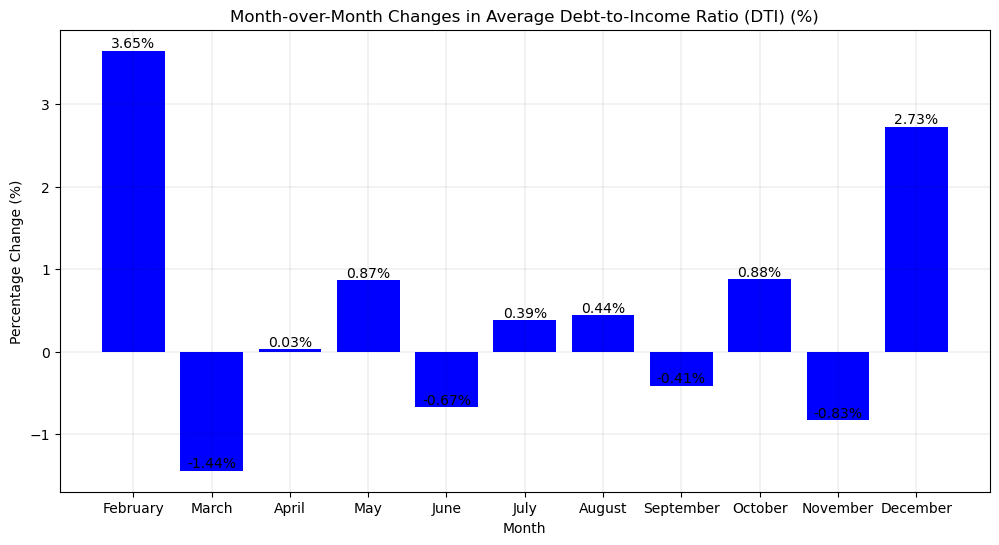

In [86]:
# Group by year and month, and count loan applications
monthly_average_dti = df.groupby(df['issue_date'].dt.to_period('M'))['dti'].mean()

# Calculate month-over-month changes
madti_changes = monthly_average_dti.pct_change() * 100  # Change to percentage

# Convert period index to string month names
madti_changes.index = madti_changes.index.strftime('%B')
madti_changes = madti_changes.dropna()

# Output the results
print("\nMonth-over-Month Changes (%):")
print(madti_changes)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(madti_changes.index, madti_changes.values, color='blue')
plt.title('Month-over-Month Changes in Average Debt-to-Income Ratio (DTI) (%)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)

# Annotate values on the bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

In [99]:
# Assume 'loan_status', 'dti', 'int_rate', 'term' are columns in the dataset

# Filter for loans that are "Fully Paid" or "Current"
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]

# Additional conditions: Define loans with DTI < 35% and moderate interest rate (< 15%) as "good"
good_loans = good_loans[(good_loans['dti'] < 35) & (good_loans['int_rate'] < 15)]

# Display summary of good loans
print("Number of Good Loans:", len(good_loans))
good_loans_summary = good_loans[['loan_status', 'dti', 'int_rate', 'term']].describe()

print("Good Loans Summary:")
print(good_loans_summary)

Number of Good Loans: 33243
Good Loans Summary:
                dti      int_rate          term
count  33243.000000  33243.000000  33243.000000
mean       0.132188      0.117553     41.796589
std        0.066764      0.036435     10.272335
min        0.000000      0.054200     36.000000
25%        0.080700      0.089000     36.000000
50%        0.132600      0.114900     36.000000
75%        0.184700      0.141800     36.000000
max        0.299900      0.245900     60.000000
